# Big Five性格検査データを元に各種教師なし学習

In [1]:
%matplotlib inline
from pathlib import Path
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.tsa import stattools
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier#k近傍法
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
import os

In [2]:
data_raw = pd.read_csv("/Users/ShuntaroMiwa/00 python/shuu/data-final.csv", sep='\t')
data = data_raw.copy()
pd.options.display.max_columns = 150

print(type(data))
data.head

<class 'pandas.core.frame.DataFrame'>


<bound method NDFrame.head of          EXT1  EXT2  EXT3  EXT4  EXT5  EXT6  EXT7  EXT8  EXT9  EXT10  EST1  \
0         4.0   1.0   5.0   2.0   5.0   1.0   5.0   2.0   4.0    1.0   1.0   
1         3.0   5.0   3.0   4.0   3.0   3.0   2.0   5.0   1.0    5.0   2.0   
2         2.0   3.0   4.0   4.0   3.0   2.0   1.0   3.0   2.0    5.0   4.0   
3         2.0   2.0   2.0   3.0   4.0   2.0   2.0   4.0   1.0    4.0   3.0   
4         3.0   3.0   3.0   3.0   5.0   3.0   3.0   5.0   3.0    4.0   1.0   
...       ...   ...   ...   ...   ...   ...   ...   ...   ...    ...   ...   
1015336   4.0   2.0   4.0   3.0   4.0   3.0   3.0   3.0   3.0    3.0   4.0   
1015337   4.0   3.0   4.0   3.0   3.0   3.0   4.0   4.0   3.0    3.0   4.0   
1015338   4.0   2.0   4.0   3.0   5.0   1.0   4.0   2.0   4.0    4.0   3.0   
1015339   2.0   4.0   3.0   4.0   2.0   2.0   1.0   4.0   2.0    4.0   4.0   
1015340   4.0   2.0   4.0   2.0   4.0   1.0   4.0   2.0   4.0    4.0   4.0   

         EST2  EST3  EST4  EST5  

In [3]:
data.drop(data.columns[50:107], axis=1, inplace=True)
data.drop(data.columns[51:], axis=1, inplace=True)

print('Number of participants: ', len(data))
data.head()

Number of participants:  1015341


EXT1  EXT2  EXT3  EXT4  EXT5  EXT6  EXT7  EXT8  EXT9  EXT10  EST1  EST2  \
0   4.0   1.0   5.0   2.0   5.0   1.0   5.0   2.0   4.0    1.0   1.0   4.0   
1   3.0   5.0   3.0   4.0   3.0   3.0   2.0   5.0   1.0    5.0   2.0   3.0   
2   2.0   3.0   4.0   4.0   3.0   2.0   1.0   3.0   2.0    5.0   4.0   4.0   
3   2.0   2.0   2.0   3.0   4.0   2.0   2.0   4.0   1.0    4.0   3.0   3.0   
4   3.0   3.0   3.0   3.0   5.0   3.0   3.0   5.0   3.0    4.0   1.0   5.0   

   EST3  EST4  EST5  EST6  EST7  EST8  EST9  EST10  AGR1  AGR2  AGR3  AGR4  \
0   4.0   2.0   2.0   2.0   2.0   2.0   3.0    2.0   2.0   5.0   2.0   4.0   
1   4.0   1.0   3.0   1.0   2.0   1.0   3.0    1.0   1.0   4.0   1.0   5.0   
2   4.0   2.0   2.0   2.0   2.0   2.0   1.0    3.0   1.0   4.0   1.0   4.0   
3   3.0   2.0   3.0   2.0   2.0   2.0   4.0    3.0   2.0   4.0   3.0   4.0   
4   5.0   3.0   1.0   1.0   1.0   1.0   3.0    2.0   1.0   5.0   1.0   5.0   

   AGR5  AGR6  AGR7  AGR8  AGR9  AGR10  CSN1  CSN2  CSN3  CSN4  CSN5  CSN6  \
0   2.0   3.0   2.0   4.0   3.0    4.0   3.0   4.0   3.0   2.0   2.0   4.0   
1   1.0   5.0   3.0   4.0   5.0    3.0   3.0   2.0   5.0   3.0   3.0   1.0   
2   2.0   4.0   1.0   4.0   4.0    3.0   4.0   2.0   2.0   2.0   3.0   3.0   
3   2.0   4.0   2.0   4.0   3.0    4.0   2.0   4.0   4.0   4.0   1.0   2.0   
4   1.0   3.0   1.0   5.0   5.0    3.0   5.0   1.0   5.0   1.0   3.0   1.0   

   CSN7  CSN8  CSN9  CSN10  OPN1  OPN2  OPN3  OPN4  OPN5  OPN6  OPN7  OPN8  \
0   4.0   2.0   4.0    4.0   5.0   1.0   4.0   1.0   4.0   1.0   5.0   3.0   
1   3.0   3.0   5.0    3.0   1.0   2.0   4.0   2.0   3.0   1.0   4.0   2.0   
2   4.0   2.0   4.0    2.0   5.0   1.0   2.0   1.0   4.0   2.0   5.0   3.0   
3   2.0   3.0   1.0    4.0   4.0   2.0   5.0   2.0   3.0   1.0   4.0   4.0   
4   5.0   1.0   5.0    5.0   5.0   1.0   5.0   1.0   5.0   1.0   5.0   3.0   

   OPN9  OPN10 country  
0   4.0    5.0      GB  
1   5.0    3.0      MY  
2   4.0    4.0      GB  
3   3.0    3.0      GB  
4   5.0    5.0      KE

In [4]:
datacol = ['EXT1','EXT2','EXT3','EXT4','EXT5','EXT6','EXT7','EXT8','EXT9','EXT10','EST1','EST2','EST3','EST4','EST5','EST6','EST7','EST8','EST9','EST10','AGR1','AGR2','AGR3','AGR4','AGR5','AGR6','AGR7','AGR8','AGR9','AGR10','CSN1','CSN2','CSN3','CSN4','CSN5','CSN6','CSN7','CSN8','CSN9','CSN10','OPN1','OPN2','OPN3','OPN4','OPN5','OPN6','OPN7','OPN8','OPN9','OPN10']

for i in datacol:
    indexNames = data[data[i] == 0].index
    data.drop(indexNames , inplace=True)
print(data)

         EXT1  EXT2  EXT3  EXT4  EXT5  EXT6  EXT7  EXT8  EXT9  EXT10  EST1  \
0         4.0   1.0   5.0   2.0   5.0   1.0   5.0   2.0   4.0    1.0   1.0   
1         3.0   5.0   3.0   4.0   3.0   3.0   2.0   5.0   1.0    5.0   2.0   
2         2.0   3.0   4.0   4.0   3.0   2.0   1.0   3.0   2.0    5.0   4.0   
3         2.0   2.0   2.0   3.0   4.0   2.0   2.0   4.0   1.0    4.0   3.0   
4         3.0   3.0   3.0   3.0   5.0   3.0   3.0   5.0   3.0    4.0   1.0   
...       ...   ...   ...   ...   ...   ...   ...   ...   ...    ...   ...   
1015336   4.0   2.0   4.0   3.0   4.0   3.0   3.0   3.0   3.0    3.0   4.0   
1015337   4.0   3.0   4.0   3.0   3.0   3.0   4.0   4.0   3.0    3.0   4.0   
1015338   4.0   2.0   4.0   3.0   5.0   1.0   4.0   2.0   4.0    4.0   3.0   
1015339   2.0   4.0   3.0   4.0   2.0   2.0   1.0   4.0   2.0    4.0   4.0   
1015340   4.0   2.0   4.0   2.0   4.0   1.0   4.0   2.0   4.0    4.0   4.0   

         EST2  EST3  EST4  EST5  EST6  EST7  EST8  EST9  EST10 

## 欠測値除去

In [5]:
print('Is there any missing value? ', data.isnull().values.any())
print('How many missing values? ', data.isnull().values.sum())
data.dropna(inplace=True)
print('Number of participants after eliminating missing values: ', len(data))

Is there any missing value?  True
How many missing values?  89218
Number of participants after eliminating missing values:  874366


In [6]:
data.describe()

# print(data[0].max)
# print(max('Z', 'A', 'J', 'W'))

EXT1           EXT2           EXT3           EXT4  \
count  874366.000000  874366.000000  874366.000000  874366.000000   
mean        2.645722       2.795878       3.298991       3.167780   
std         1.250873       1.306719       1.188253       1.210437   
min         1.000000       1.000000       1.000000       1.000000   
25%         2.000000       2.000000       2.000000       2.000000   
50%         3.000000       3.000000       3.000000       3.000000   
75%         4.000000       4.000000       4.000000       4.000000   
max         5.000000       5.000000       5.000000       5.000000   

                EXT5           EXT6           EXT7           EXT8  \
count  874366.000000  874366.000000  874366.000000  874366.000000   
mean        3.297526       2.411209       2.780486       3.443966   
std         1.239671       1.208842       1.380443       1.242380   
min         1.000000       1.000000       1.000000       1.000000   
25%         2.000000       1.000000       2.000000       2.000000   
50%         3.000000       2.000000       3.000000       4.000000   
75%         4.000000       3.000000       4.000000       4.000000   
max         5.000000       5.000000       5.000000       5.000000   

                EXT9          EXT10           EST1           EST2  \
count  874366.000000  874366.000000  874366.000000  874366.000000   
mean        2.979552       3.588271       3.310365       3.197194   
std         1.325272       1.274354       1.318010       1.191388   
min         1.000000       1.000000       1.000000       1.000000   
25%         2.000000       3.000000       2.000000       2.000000   
50%         3.000000       4.000000       3.000000       3.000000   
75%         4.000000       5.000000       4.000000       4.000000   
max         5.000000       5.000000       5.000000       5.000000   

                EST3           EST4           EST5           EST6  \
count  874366.000000  874366.000000  874366.000000  874366.000000   
mean        3.867571       2.689092       2.852700       2.866237   
std         1.129275       1.227435       1.254421       1.296898   
min         1.000000       1.000000       1.000000       1.000000   
25%         3.000000       2.000000       2.000000       2.000000   
50%         4.000000       3.000000       3.000000       3.000000   
75%         5.000000       4.000000       4.000000       4.000000   
max         5.000000       5.000000       5.000000       5.000000   

                EST7           EST8           EST9          EST10  \
count  874366.000000  874366.000000  874366.000000  874366.000000   
mean        3.063024       2.694089       3.103289       2.795145   
std         1.270452       1.324291       1.274183       1.305115   
min         1.000000       1.000000       1.000000       1.000000   
25%         2.000000       2.000000       2.000000       2.000000   
50%         3.000000       3.000000       3.000000       3.000000   
75%         4.000000       4.000000       4.000000       4.000000   
max         5.000000       5.000000       5.000000       5.000000   

                AGR1           AGR2           AGR3           AGR4  \
count  874366.000000  874366.000000  874366.000000  874366.000000   
mean        2.247912       3.867908       2.270176       3.956937   
std         1.321236       1.080131       1.266203       1.075861   
min         1.000000       1.000000       1.000000       1.000000   
25%         1.000000       3.000000       1.000000       3.000000   
50%         2.000000       4.000000       2.000000       4.000000   
75%         3.000000       5.000000       3.000000       5.000000   
max         5.000000       5.000000       5.000000       5.000000   

                AGR5           AGR6           AGR7           AGR8  \
count  874366.000000  874366.000000  874366.000000  874366.000000   
mean        2.285025       3.778313       2.209331       3.719953   
std         1.155356       1.165010       1.105137       1.041949   
min     

## 逆転項目

In [11]:
# to check whether the reverse items re-coded correctly - 1
data[["EXT2","EXT4", "EST2", "AGR1", "CSN8","OPN6"]].head()

EXT2  EXT4  EST2  AGR1  CSN8  OPN6
0   5.0   4.0   2.0   4.0   4.0   5.0
1   1.0   2.0   3.0   5.0   3.0   5.0
2   3.0   2.0   2.0   5.0   4.0   4.0
3   4.0   3.0   3.0   4.0   3.0   5.0
4   3.0   3.0   1.0   5.0   5.0   5.0

In [12]:
#re-encoding reverse items
data.EXT2 = 6 - data.EXT2.values
data.EXT4 = 6 - data.EXT4.values
data.EXT6 = 6 - data.EXT6.values
data.EXT8 = 6 - data.EXT8.values
data.EXT10 = 6 - data.EXT10.values
data.EST2 = 6 - data.EST2.values
data.EST4 = 6 - data.EST4.values
data.AGR1 = 6 - data.AGR1.values
data.AGR3 = 6 - data.AGR3.values
data.AGR5 = 6 - data.AGR5.values
data.AGR7 = 6 - data.AGR7.values
data.CSN2 = 6 - data.CSN2.values
data.CSN4 = 6 - data.CSN4.values
data.CSN6 = 6 - data.CSN6.values
data.CSN8 = 6 - data.CSN8.values
data.OPN2 = 6 - data.OPN2.values
data.OPN4 = 6 - data.OPN4.values
data.OPN6 = 6 - data.OPN6.values

# alternatively : 
#data['EXT2'] = data['EXT2'].map({1:5, 2:4, 3:3, 4:2, 5:1})

In [13]:
# to check whether the reverse items re-coded correctly - 2
data[["EXT2","EXT4", "EST2", "AGR1", "CSN8","OPN6"]].head()

EXT2  EXT4  EST2  AGR1  CSN8  OPN6
0   1.0   2.0   4.0   2.0   2.0   1.0
1   5.0   4.0   3.0   1.0   3.0   1.0
2   3.0   4.0   4.0   1.0   2.0   2.0
3   2.0   3.0   3.0   2.0   3.0   1.0
4   3.0   3.0   5.0   1.0   1.0   1.0

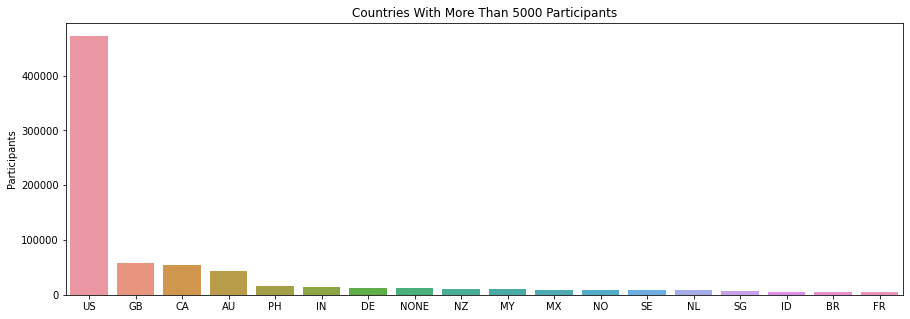

In [14]:
# Participants' nationality distriution
countries = pd.DataFrame(data['country'].value_counts())
countries_5000 = countries[countries['country'] >= 5000]
plt.figure(figsize=(15,5))
g = sns.barplot(data=countries_5000, x=countries_5000.index, y='country')

# for index, row in countries_5000.iterrows():
#     g.text(row.name,row.tip, round(row.total_bill,2), color='black', ha="center")

plt.title('Countries With More Than 5000 Participants')
plt.ylabel('Participants');

In [15]:
data_jp= data[data['country']=='JP']
data_jp.dropna(inplace=True)

<ipython-input-15-07e808e214bf>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_jp.dropna(inplace=True)


In [16]:
# Groups and Questions
ext_questions = {'EXT1' : 'I am the life of the party',
                 'EXT2' : 'I dont talk a lot',
                 'EXT3' : 'I feel comfortable around people',
                 'EXT4' : 'I keep in the background',
                 'EXT5' : 'I start conversations',
                 'EXT6' : 'I have little to say',
                 'EXT7' : 'I talk to a lot of different people at parties',
                 'EXT8' : 'I dont like to draw attention to myself',
                 'EXT9' : 'I dont mind being the center of attention',
                 'EXT10': 'I am quiet around strangers'}

est_questions = {'EST1' : 'I get stressed out easily',
                 'EST2' : 'I am relaxed most of the time',
                 'EST3' : 'I worry about things',
                 'EST4' : 'I seldom feel blue',
                 'EST5' : 'I am easily disturbed',
                 'EST6' : 'I get upset easily',
                 'EST7' : 'I change my mood a lot',
                 'EST8' : 'I have frequent mood swings',
                 'EST9' : 'I get irritated easily',
                 'EST10': 'I often feel blue'}

agr_questions = {'AGR1' : 'I feel little concern for others',
                 'AGR2' : 'I am interested in people',
                 'AGR3' : 'I insult people',
                 'AGR4' : 'I sympathize with others feelings',
                 'AGR5' : 'I am not interested in other peoples problems',
                 'AGR6' : 'I have a soft heart',
                 'AGR7' : 'I am not really interested in others',
                 'AGR8' : 'I take time out for others',
                 'AGR9' : 'I feel others emotions',
                 'AGR10': 'I make people feel at ease'}

csn_questions = {'CSN1' : 'I am always prepared',
                 'CSN2' : 'I leave my belongings around',
                 'CSN3' : 'I pay attention to details',
                 'CSN4' : 'I make a mess of things',
                 'CSN5' : 'I get chores done right away',
                 'CSN6' : 'I often forget to put things back in their proper place',
                 'CSN7' : 'I like order',
                 'CSN8' : 'I shirk my duties',
                 'CSN9' : 'I follow a schedule',
                 'CSN10' : 'I am exacting in my work'}

opn_questions = {'OPN1' : 'I have a rich vocabulary',
                 'OPN2' : 'I have difficulty understanding abstract ideas',
                 'OPN3' : 'I have a vivid imagination',
                 'OPN4' : 'I am not interested in abstract ideas',
                 'OPN5' : 'I have excellent ideas',
                 'OPN6' : 'I do not have a good imagination',
                 'OPN7' : 'I am quick to understand things',
                 'OPN8' : 'I use difficult words',
                 'OPN9' : 'I spend time reflecting on things',
                 'OPN10': 'I am full of ideas'}

# Group Names and Columns
EXT = [column for column in data if column.startswith('EXT')]
EST = [column for column in data if column.startswith('EST')]
AGR = [column for column in data if column.startswith('AGR')]
CSN = [column for column in data if column.startswith('CSN')]
OPN = [column for column in data if column.startswith('OPN')]

EXT_jp = [column for column in data_jp if column.startswith('EXT')]
EST_jp = [column for column in data_jp if column.startswith('EST')]
AGR_jp = [column for column in data_jp if column.startswith('AGR')]
CSN_jp = [column for column in data_jp if column.startswith('CSN')]
OPN_jp = [column for column in data_jp if column.startswith('OPN')]

In [17]:
# Defining a function to visualize the questions and answers distribution
def vis_questions(groupname, questions, color):
    plt.figure(figsize=(40,60))
    for i in range(1, 11):
        plt.subplot(10,5,i)
        plt.hist(data[groupname[i-1]], bins=14, color= color, alpha=.5)
        plt.title(questions[groupname[i-1]], fontsize=18)
#         plt.hist(data_jp[groupname[i-1]], bins=14, color= color, alpha=.5)
#         plt.title(questions[groupname[i-1]], fontsize=18)

def vis_questions_jp(groupname, questions, color):
    plt.figure(figsize=(40,60))
    for i in range(1, 11):
        plt.subplot(10,5,i)
        plt.hist(data[groupname[i-1]], bins=14, color= color, alpha=.5)
        plt.title(questions[groupname[i-1]], fontsize=18)
#         plt.hist(data_jp[groupname[i-1]], bins=14, color= color, alpha=.5)
#         plt.title(questions[groupname[i-1]], fontsize=18)

Q&As Related to Extroversion Personality


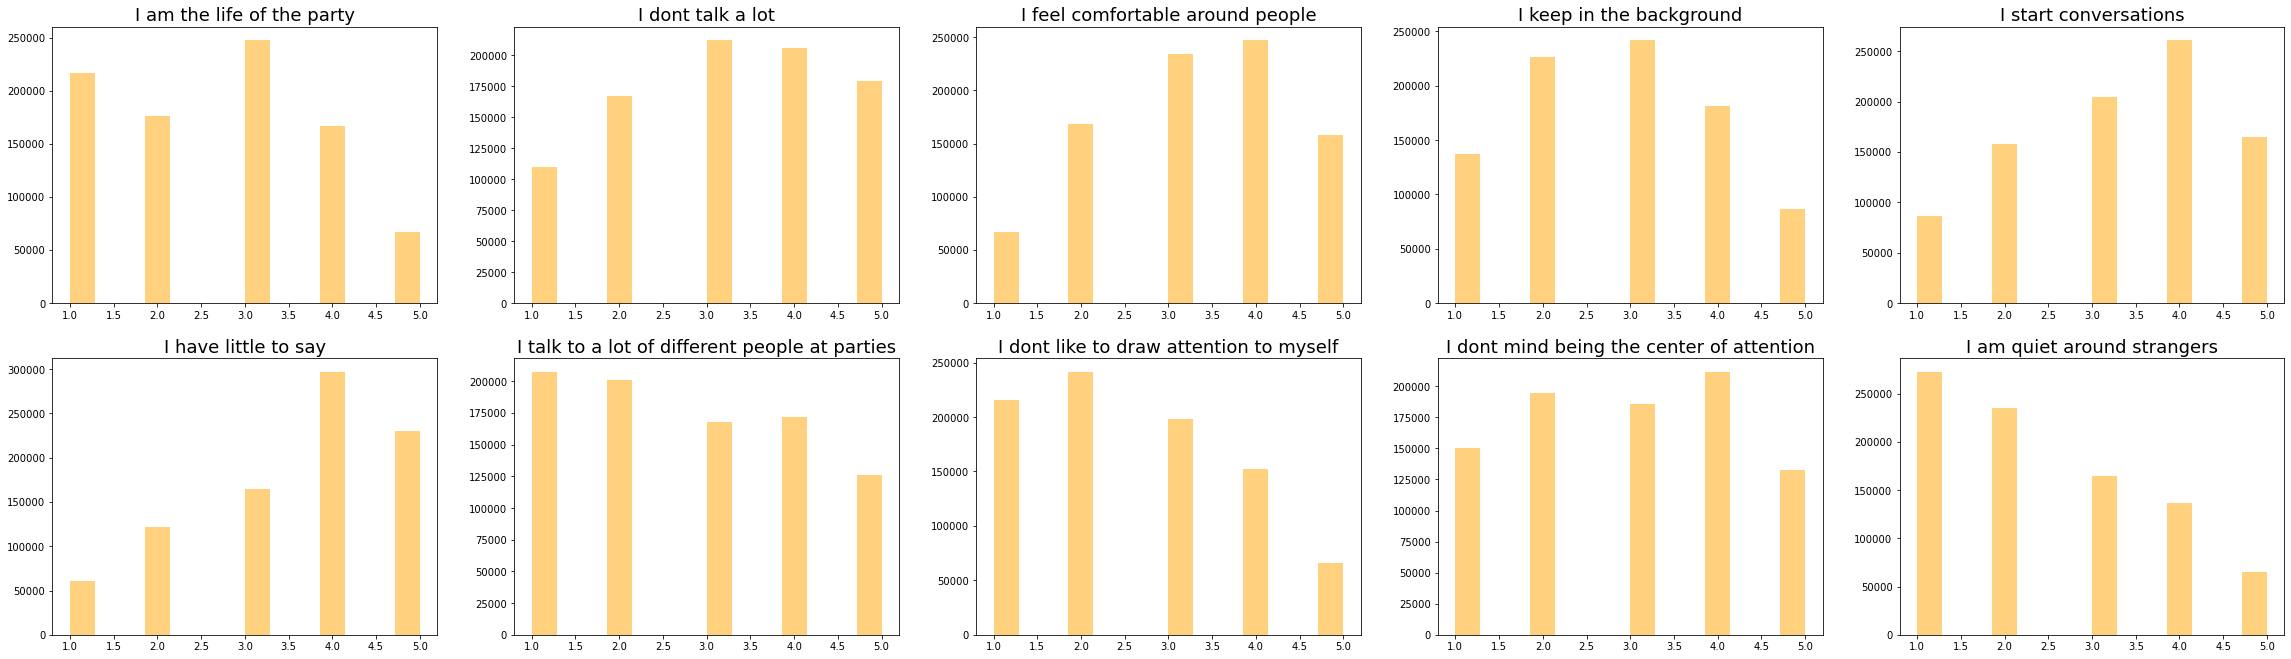

In [15]:
print('Q&As Related to Extroversion Personality')
vis_questions(EXT, ext_questions, 'orange')

Q&As Related to Extroversion Personality in Japan


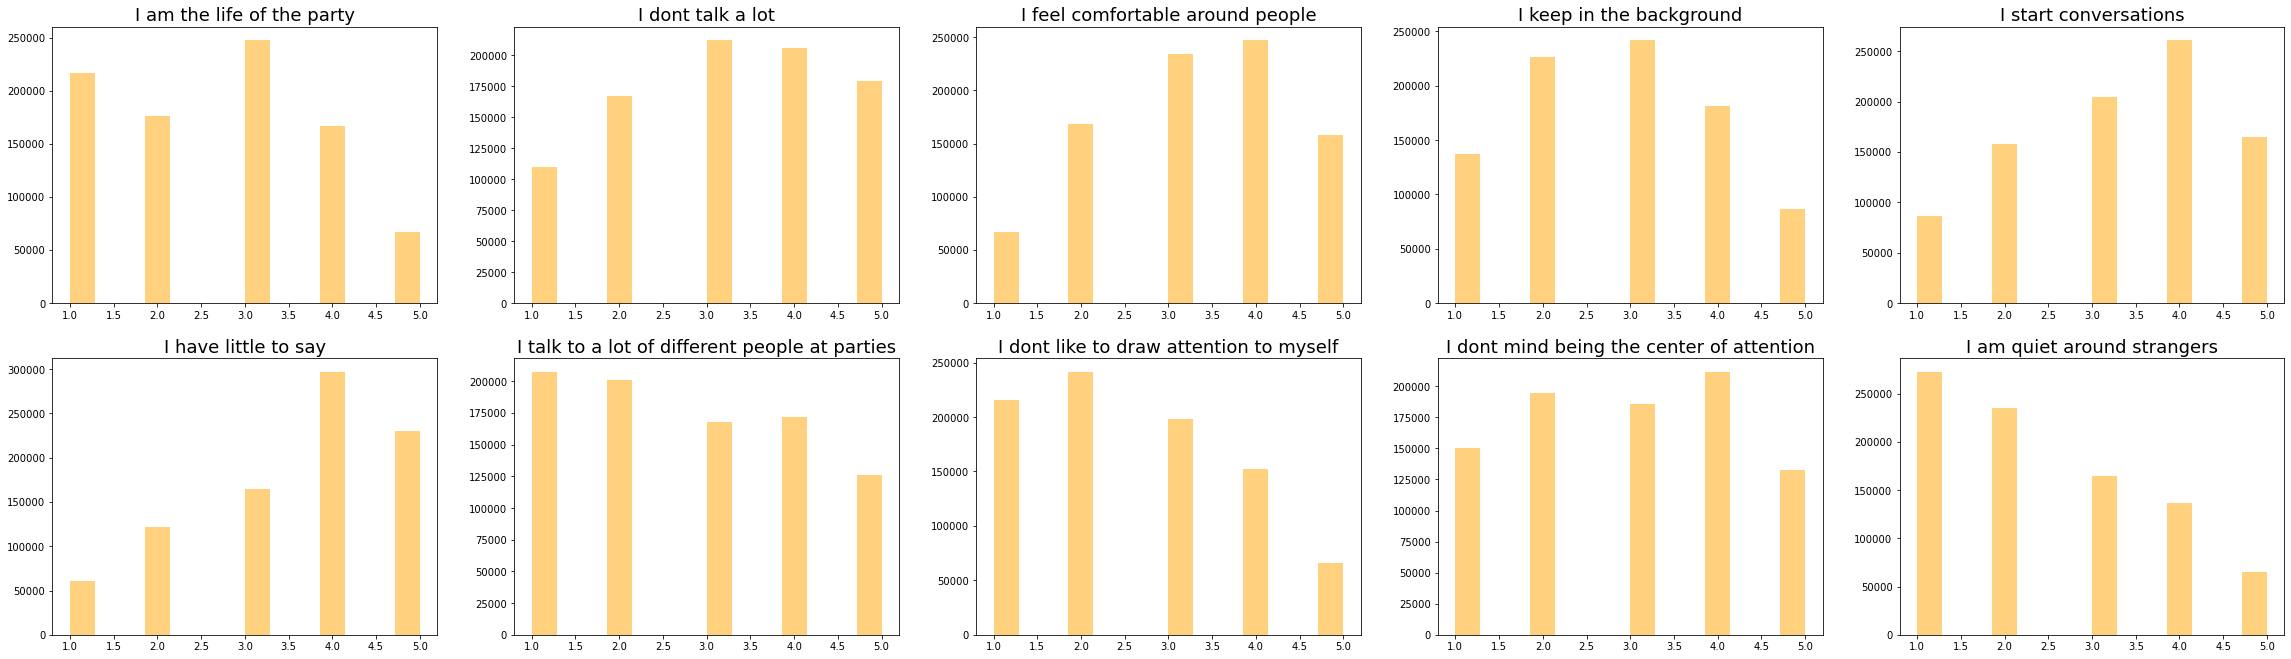

In [16]:
print('Q&As Related to Extroversion Personality in Japan')
vis_questions_jp(EXT_jp, ext_questions, 'orange')

Q&As Related to Neuroticism Personality


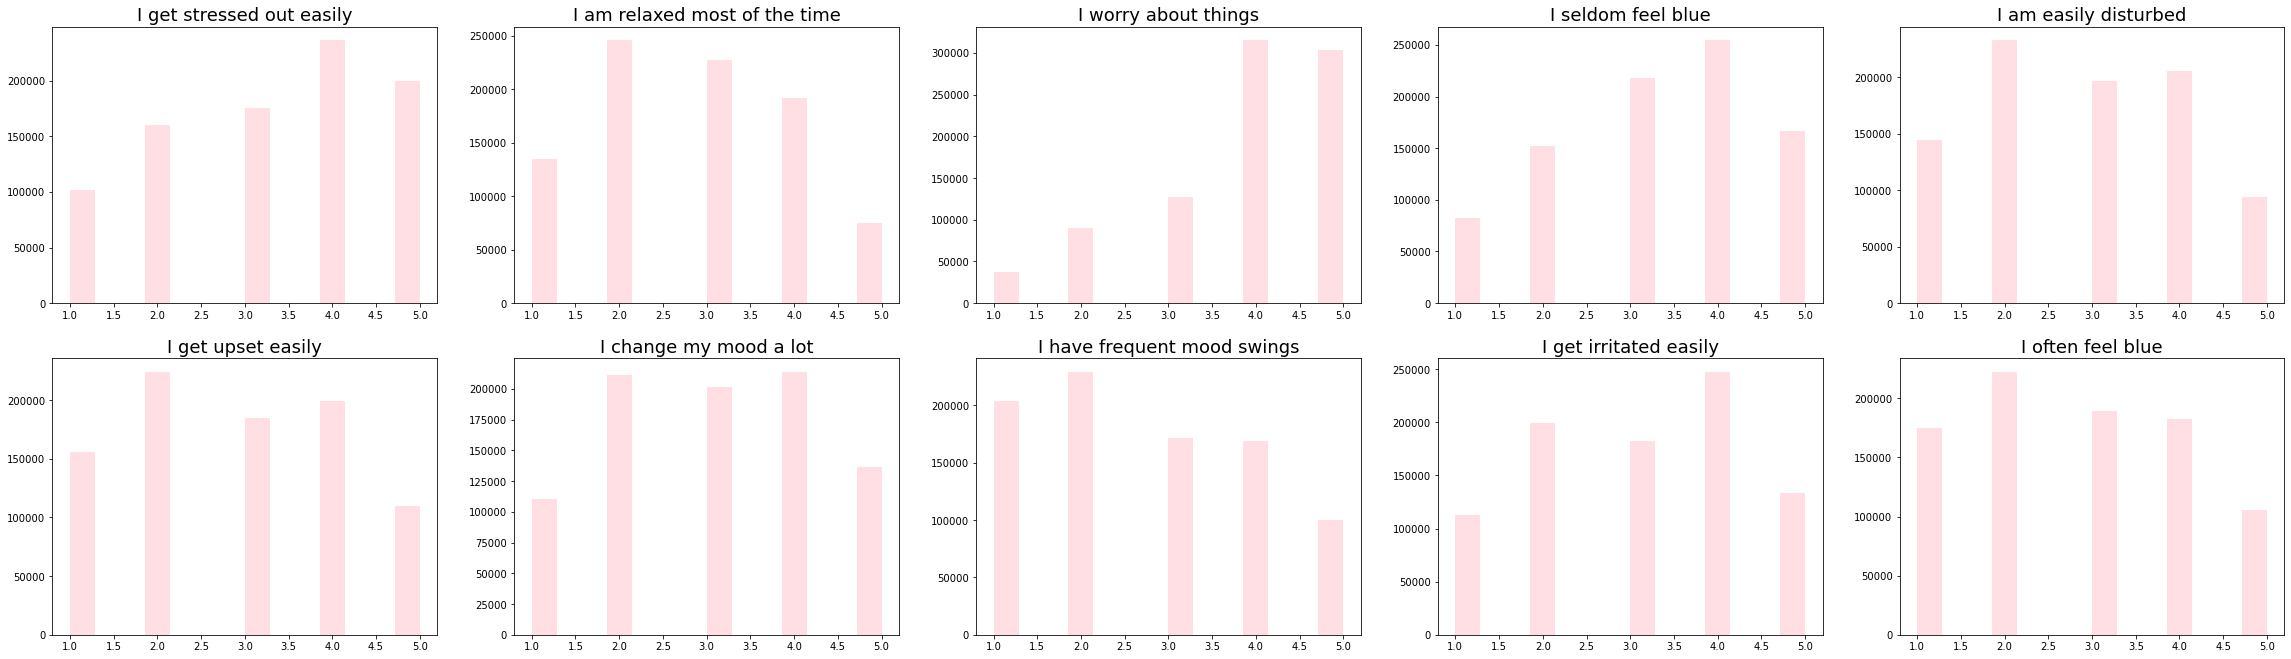

In [17]:
print('Q&As Related to Neuroticism Personality')
vis_questions(EST, est_questions, 'pink')

Q&As Related to Neuroticism Personality in Japan


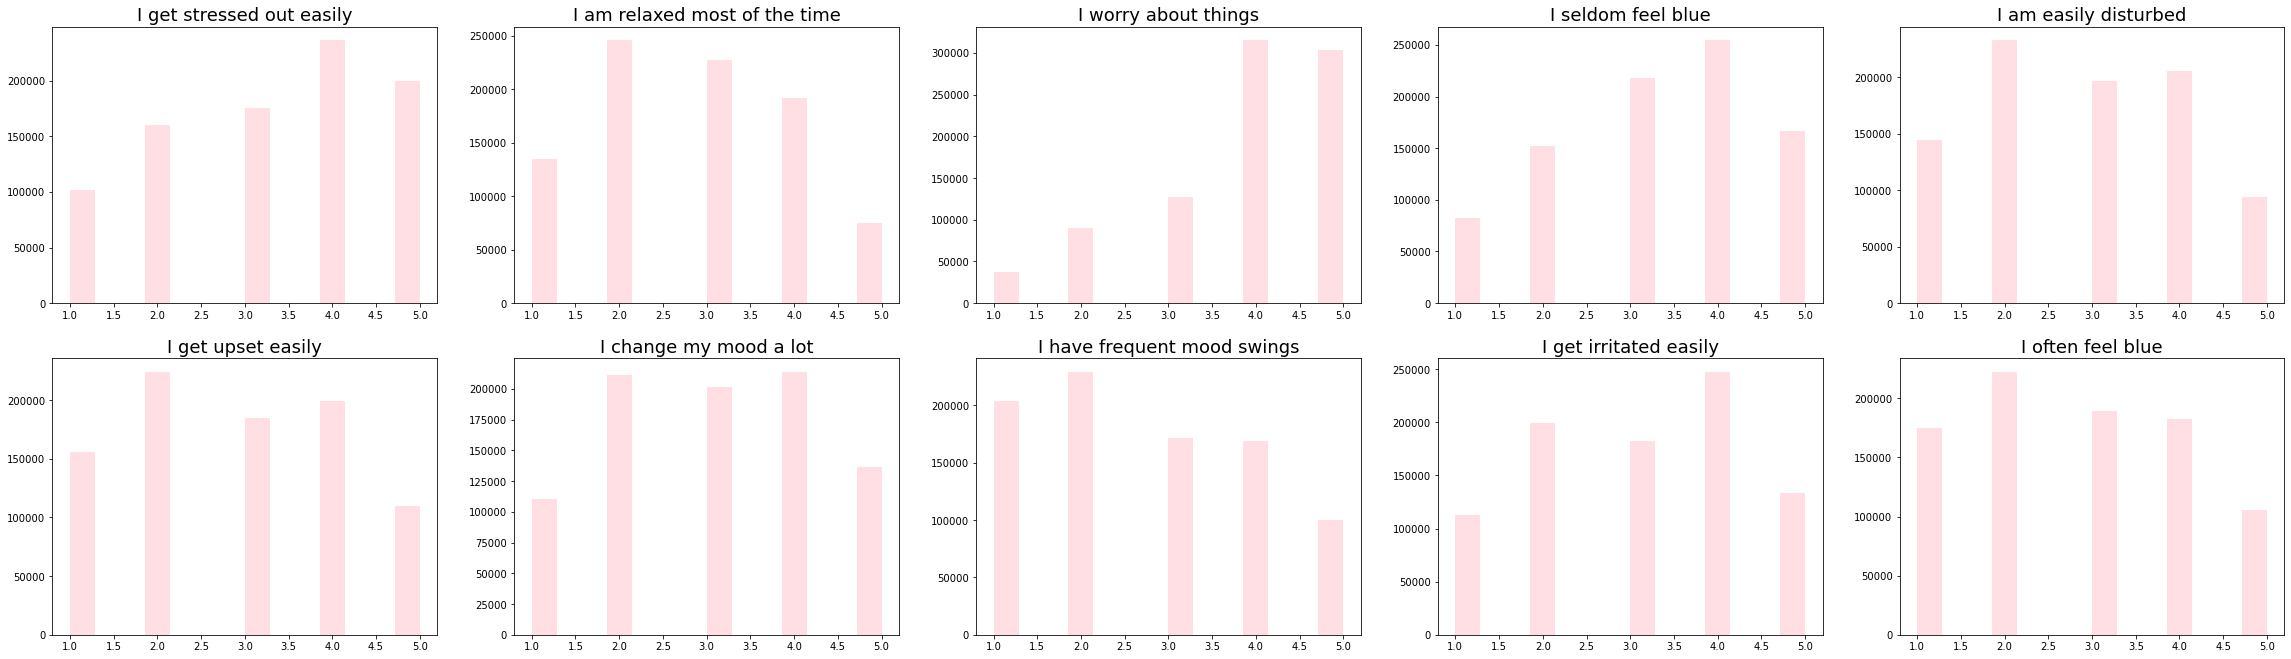

In [18]:
print('Q&As Related to Neuroticism Personality in Japan')
vis_questions_jp(EST_jp, est_questions, 'pink')

Q&As Related to Agreeable Personality


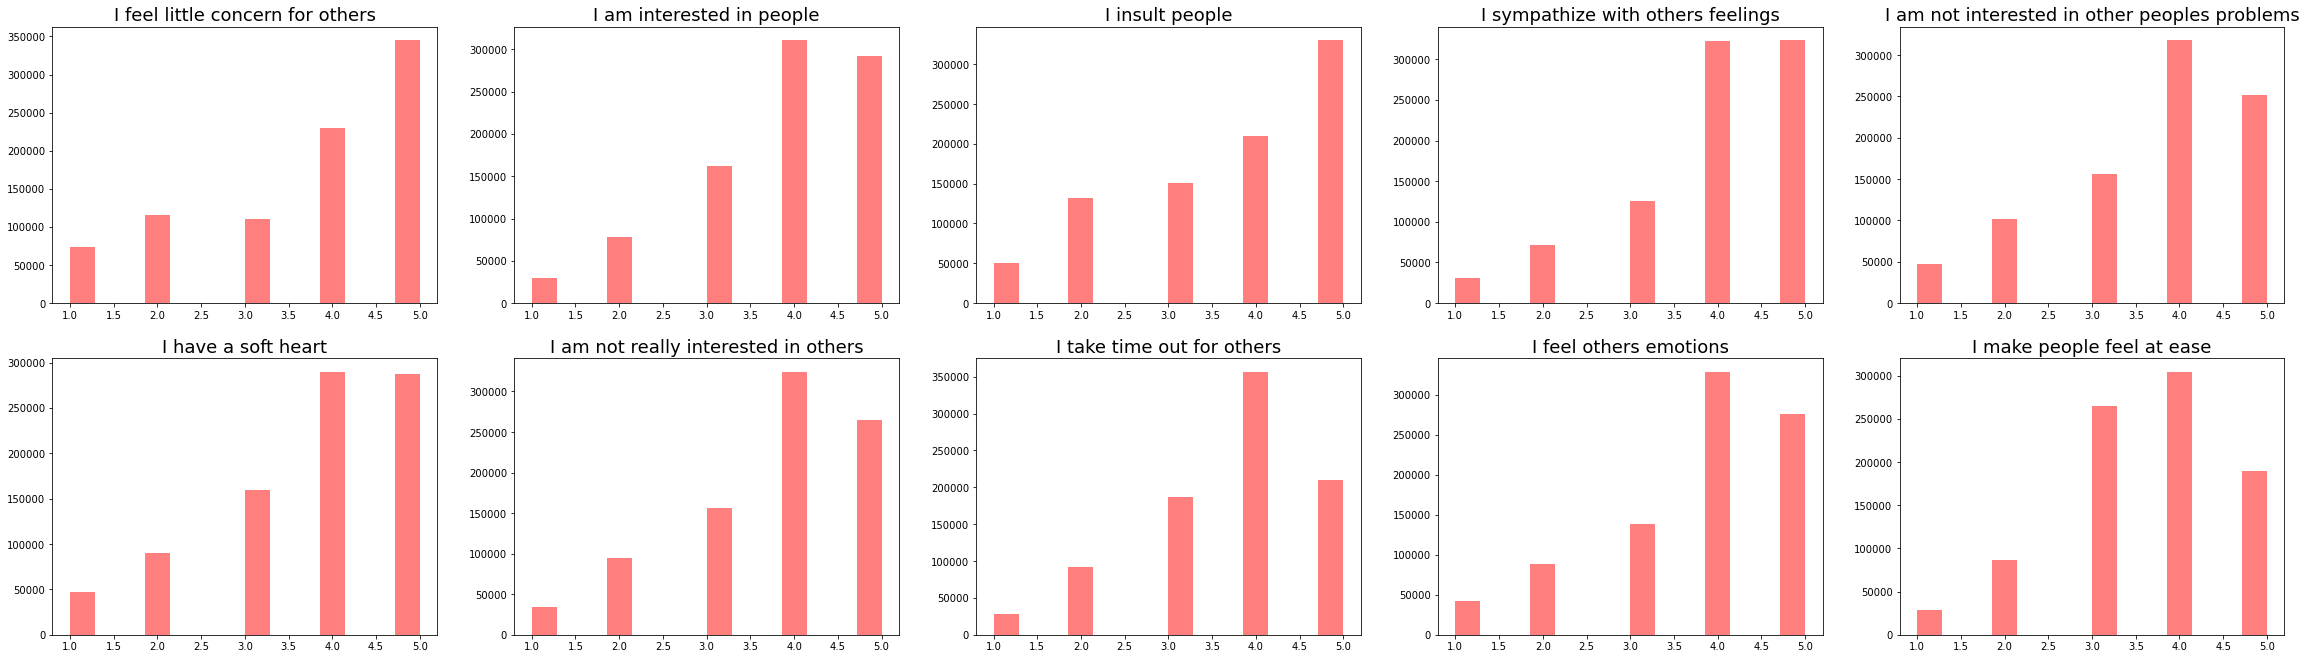

In [19]:
print('Q&As Related to Agreeable Personality')
vis_questions(AGR, agr_questions, 'red')

Q&As Related to Agreeable Personality in Japan


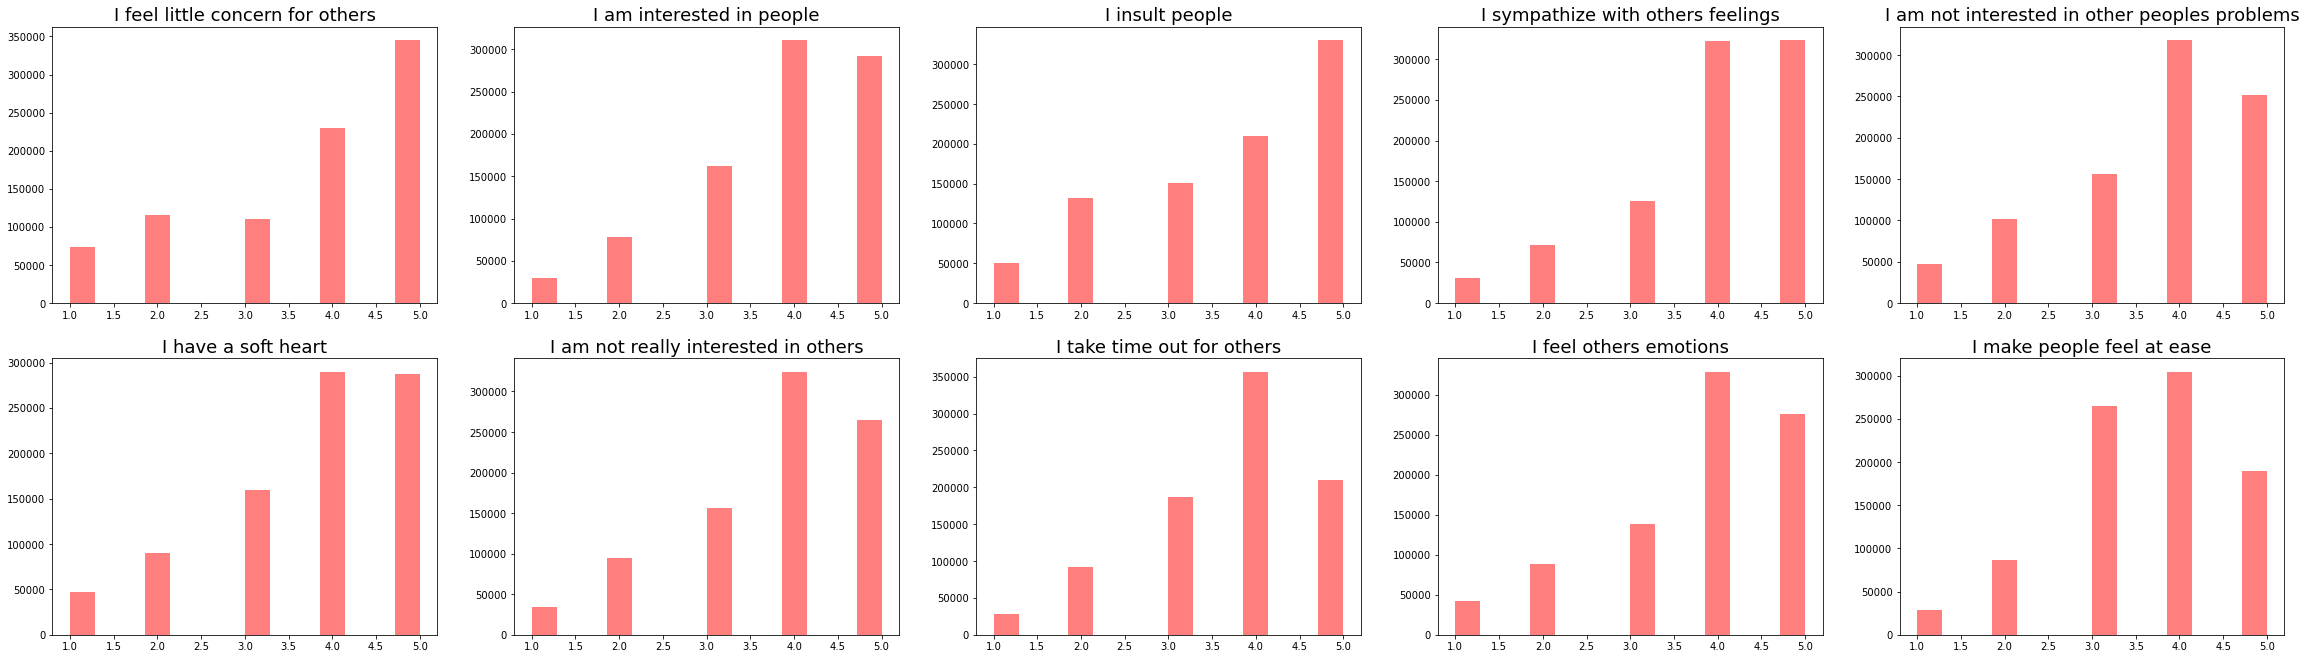

In [20]:
print('Q&As Related to Agreeable Personality in Japan')
vis_questions_jp(AGR_jp, agr_questions, 'red')

Q&As Related to Conscientious Personality


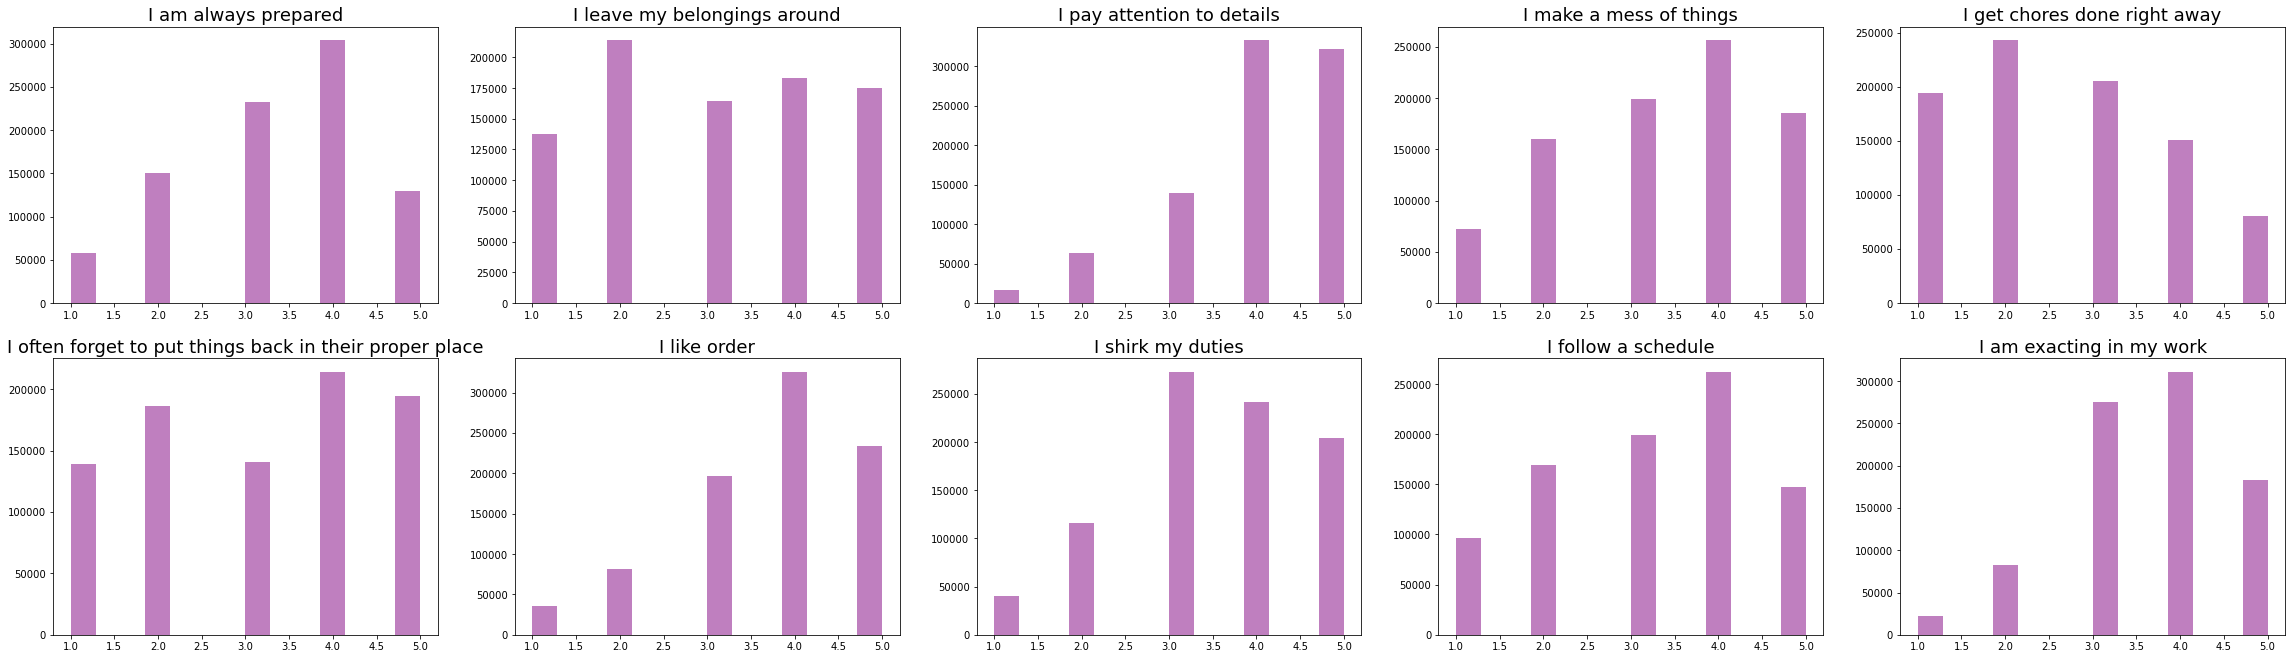

In [21]:
print('Q&As Related to Conscientious Personality')
vis_questions(CSN, csn_questions, 'purple')

Q&As Related to Conscientious Personality in Japan


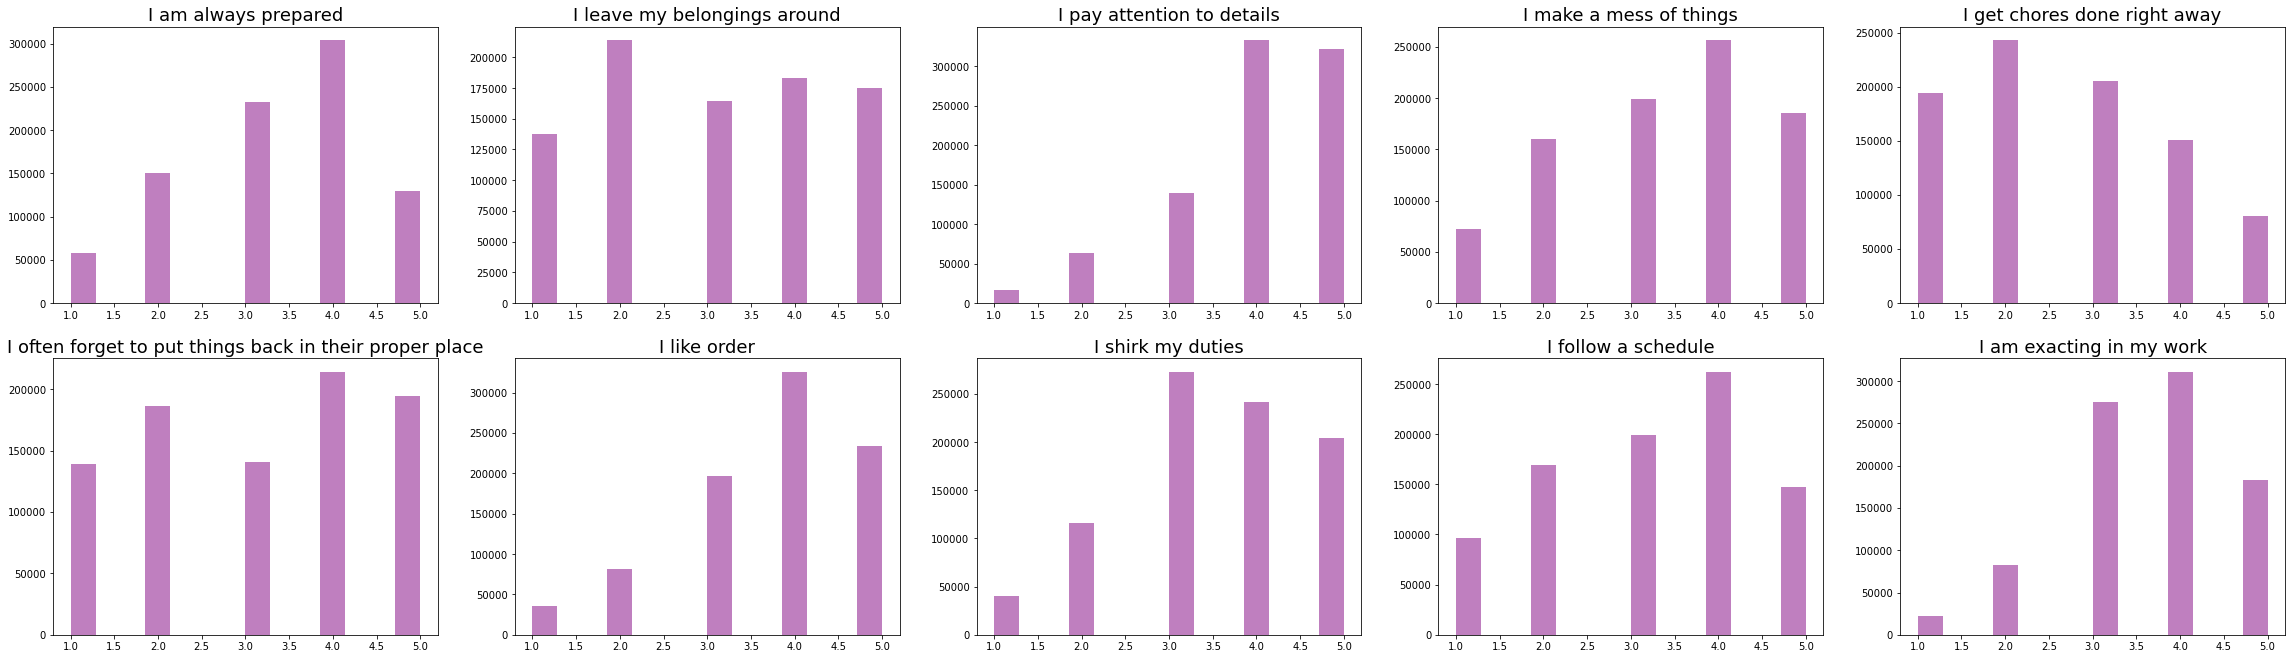

In [22]:
print('Q&As Related to Conscientious Personality in Japan')
vis_questions_jp(CSN_jp, csn_questions, 'purple')

Q&As Related to Open Personality


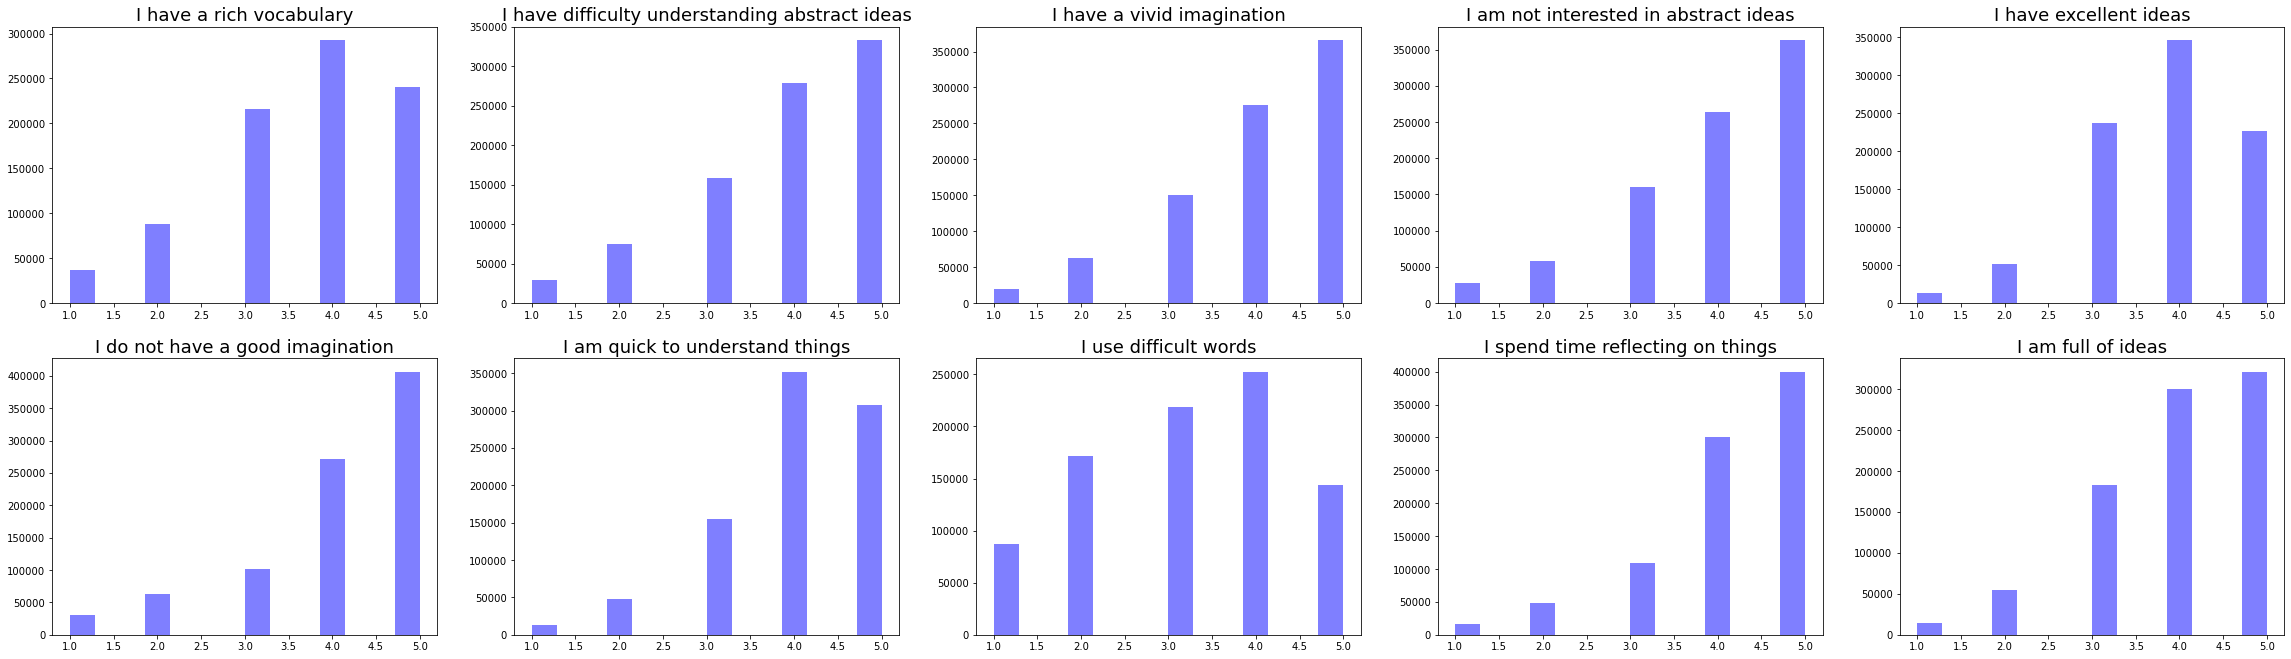

In [23]:
print('Q&As Related to Open Personality')
vis_questions(OPN, opn_questions, 'blue')

Q&As Related to Open Personality in Japan


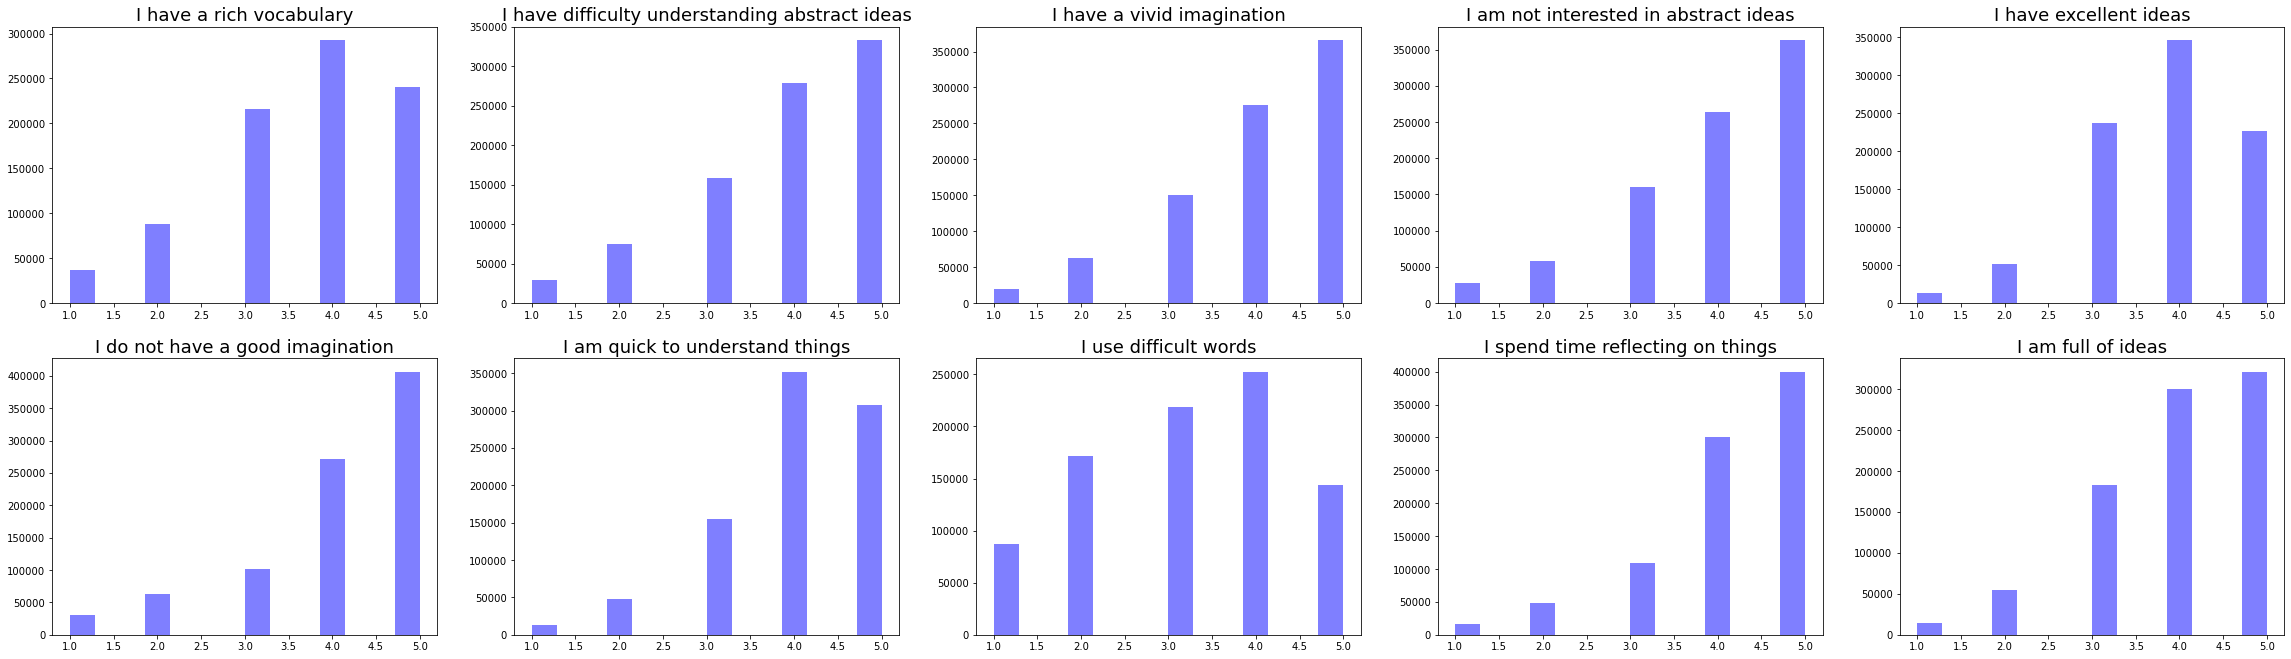

In [24]:
print('Q&As Related to Open Personality in Japan')
vis_questions_jp(OPN_jp, opn_questions, 'blue')

In [43]:
# For ease of calculation lets scale all the values between 0-1 and take a sample of 5000 
from sklearn.preprocessing import MinMaxScaler

df = data.drop('country', axis=1)#'country'列を削除
columns = list(df.columns)
print(columns)
df_sample = df[:5000]#5000までをサンプル（無作為抽出の方が良いような）

df_jp = data_jp.drop('country', axis=1)
print(df_sample)

['EXT1', 'EXT2', 'EXT3', 'EXT4', 'EXT5', 'EXT6', 'EXT7', 'EXT8', 'EXT9', 'EXT10', 'EST1', 'EST2', 'EST3', 'EST4', 'EST5', 'EST6', 'EST7', 'EST8', 'EST9', 'EST10', 'AGR1', 'AGR2', 'AGR3', 'AGR4', 'AGR5', 'AGR6', 'AGR7', 'AGR8', 'AGR9', 'AGR10', 'CSN1', 'CSN2', 'CSN3', 'CSN4', 'CSN5', 'CSN6', 'CSN7', 'CSN8', 'CSN9', 'CSN10', 'OPN1', 'OPN2', 'OPN3', 'OPN4', 'OPN5', 'OPN6', 'OPN7', 'OPN8', 'OPN9', 'OPN10']
      EXT1  EXT2  EXT3  EXT4  EXT5  EXT6  EXT7  EXT8  EXT9  EXT10  EST1  EST2  \
0      4.0   1.0   5.0   2.0   5.0   1.0   5.0   2.0   4.0    1.0   1.0   4.0   
1      3.0   5.0   3.0   4.0   3.0   3.0   2.0   5.0   1.0    5.0   2.0   3.0   
2      2.0   3.0   4.0   4.0   3.0   2.0   1.0   3.0   2.0    5.0   4.0   4.0   
3      2.0   2.0   2.0   3.0   4.0   2.0   2.0   4.0   1.0    4.0   3.0   3.0   
4      3.0   3.0   3.0   3.0   5.0   3.0   3.0   5.0   3.0    4.0   1.0   5.0   
...    ...   ...   ...   ...   ...   ...   ...   ...   ...    ...   ...   ...   
5832   3.0   2.0   3.0   3.

In [49]:
scaler = MinMaxScaler(feature_range=(0,1))#0〜1に正規化
df = scaler.fit_transform(df)#0〜1に正規化, 平均・標準偏差作成（・インスタンス作成）
df = pd.DataFrame(df, columns=columns)
#df_sample = random.sample(df, 5000)#できず
df_sample = df[:5000]#5000までをサンプル（無作為抽出の方が良いような）

df_jp = scaler.fit_transform(df_jp)#0〜1に正規化, 平均・標準偏差作成（・インスタンス作成）
df_jp = pd.DataFrame(df_jp, columns=columns)

#df_sample.head()
df_jp.head()

EXT1  EXT2  EXT3  EXT4  EXT5  EXT6  EXT7  EXT8  EXT9  EXT10  EST1  EST2  \
0  0.50  0.25  0.75  0.25  0.75  0.75  0.75  0.25  0.50   0.25  0.50  0.50   
1  0.50  1.00  0.25  0.25  0.00  0.75  0.00  0.25  0.25   1.00  0.75  0.50   
2  0.00  0.50  0.25  1.00  0.25  0.25  0.00  1.00  0.00   1.00  0.75  0.75   
3  0.50  0.25  0.50  0.50  0.25  0.25  0.25  0.50  1.00   0.50  0.00  1.00   
4  0.25  0.50  0.25  0.25  1.00  0.00  0.50  0.25  0.75   0.75  0.75  0.75   

   EST3  EST4  EST5  EST6  EST7  EST8  EST9  EST10  AGR1  AGR2  AGR3  AGR4  \
0  0.75  1.00  0.25  0.00  0.00  0.00  0.50   0.00  1.00  0.75   0.0  0.75   
1  0.50  0.75  0.25  0.25  0.50  0.50  0.25   0.25  0.25  0.75   1.0  0.75   
2  1.00  0.25  0.00  0.25  0.50  0.25  0.75   0.75  0.25  0.75   1.0  0.75   
3  0.25  0.50  0.00  0.00  0.00  0.00  0.00   0.00  0.00  1.00   0.0  1.00   
4  0.25  1.00  0.75  0.25  0.25  0.00  0.25   0.00  0.00  0.25   0.0  1.00   

   AGR5  AGR6  AGR7  AGR8  AGR9  AGR10  CSN1  CSN2  CSN3  CSN4  CSN5  CSN6  \
0  0.25  0.75  0.25  0.75  1.00   0.75  1.00  0.00  1.00  0.00  1.00  0.00   
1  0.75  1.00  0.25  0.00  0.75   0.50  0.50  1.00  0.50  0.25  0.25  1.00   
2  0.50  0.75  0.25  0.75  0.50   0.25  0.50  0.25  1.00  0.50  0.00  0.00   
3  0.00  0.75  0.00  1.00  1.00   1.00  0.25  0.75  0.75  0.25  0.00  0.25   
4  0.25  0.25  0.75  0.25  1.00   1.00  0.75  0.00  1.00  0.00  1.00  0.00   

   CSN7  CSN8  CSN9  CSN10  OPN1  OPN2  OPN3  OPN4  OPN5  OPN6  OPN7  OPN8  \
0   1.0  0.00  1.00   1.00  0.50  0.00  0.50  0.50  1.00  0.25  1.00  0.50   
1   0.0  0.75  0.25   0.50  0.50  0.00  1.00  0.25  0.75  0.00  1.00  0.25   
2   1.0  1.00  0.25   0.75  1.00  0.25  1.00  0.00  0.25  0.00  0.75  0.50   
3   0.5  0.50  0.50   1.00  0.75  0.00  0.50  0.00  0.75  0.00  1.00  0.75   
4   0.0  0.00  0.75   0.75  1.00  0.00  0.75  0.00  0.75  0.00  1.00  1.00   

   OPN9  OPN10  
0  1.00   1.00  
1  0.00   0.75  
2  1.00   0.50  
3  1.00   0.75  
4  0.75   0.75

In [20]:
from sklearn.decomposition import PCA

# 主成分分析のモデルを生成
pca = PCA() # インスタンスを生成･定義
pca.fit(df_sample)

PCA()

In [22]:
# 固有値を取得
ev = pca.explained_variance_

# 行名･列名を付与してデータフレームに変換
pd.DataFrame(ev, 
             index=["PC{}".format(x + 1) for x in range(len(df.columns))], 
             columns=["固有値"])

固有値
PC1   0.716854
PC2   0.453811
PC3   0.345588
PC4   0.259394
PC5   0.247495
PC6   0.127350
PC7   0.110630
PC8   0.096052
PC9   0.087557
PC10  0.083009
PC11  0.081285
PC12  0.077265
PC13  0.073262
PC14  0.067456
PC15  0.065438
PC16  0.064766
PC17  0.060014
PC18  0.058780
PC19  0.056001
PC20  0.054919
PC21  0.053443
PC22  0.051560
PC23  0.050661
PC24  0.048652
PC25  0.047118
PC26  0.044871
PC27  0.044546
PC28  0.044112
PC29  0.042453
PC30  0.041862
PC31  0.040967
PC32  0.040648
PC33  0.039856
PC34  0.039037
PC35  0.038763
PC36  0.037667
PC37  0.037004
PC38  0.036133
PC39  0.034616
PC40  0.033809
PC41  0.032932
PC42  0.032429
PC43  0.031838
PC44  0.029495
PC45  0.027160
PC46  0.025566
PC47  0.024662
PC48  0.024154
PC49  0.023372
PC50  0.019747

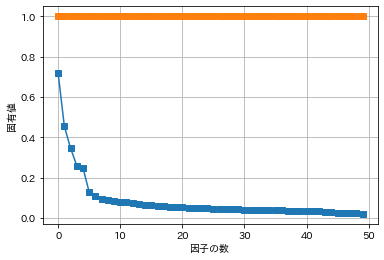

In [23]:
import japanize_matplotlib

# 基準線(固有値1)をひくためのダミーデータ
ev_1 = np.ones(50)

# 変数を指定
plt.plot(ev, 's-')   # 主成分分析による固有値
plt.plot(ev_1, 's-') # ダミーデータ

# 軸名を指定
plt.xlabel("因子の数")
plt.ylabel("固有値")

plt.grid()
plt.show()

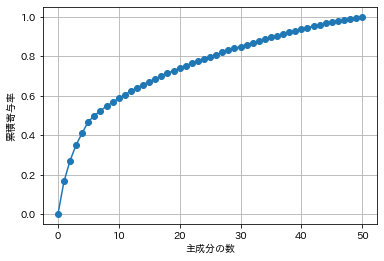

In [24]:
# 寄与率の取得
evr = pca.explained_variance_ratio_

# 行名･列名を付与してデータフレームに変換
pd.DataFrame(evr, 
             index=["PC{}".format(x + 1) for x in range(len(df.columns))], 
             columns=["寄与率"])

# 起点0と寄与率の累積値をプロット
plt.plot([0] + list(np.cumsum(evr)), "-o")

plt.xlabel("主成分の数")
plt.ylabel("累積寄与率")

plt.grid()
plt.show()

In [25]:
# sklearnの標準化メソッドをインポート
from sklearn.preprocessing import StandardScaler

# 標準化の実行
sc = StandardScaler() # インスタンスを生成･定義
sc.fit(df)            # データ変換の計算式を生成
z = sc.transform(df)  # 実際にデータを変換

print("標準化得点：\n", z)
print(" ")
print("行列の形状：", z.shape)

標準化得点：
 [[ 1.08266712 -1.37434291  1.43152142 ... -0.18101931 -0.17160515
   1.03028604]
 [ 0.28322506  1.68676172 -0.25162292 ... -0.99886218  0.85764201
  -0.99770106]
 [-0.51621699  0.15620941  0.58994925 ... -0.18101931 -0.17160515
   0.01629249]
 ...
 [ 1.08266712 -0.60906675  0.58994925 ...  1.45466643 -0.17160515
   1.03028604]
 [-0.51621699  0.92148556 -0.25162292 ...  1.45466643  0.85764201
  -0.99770106]
 [ 1.08266712 -0.60906675  0.58994925 ...  0.63682356  0.85764201
   1.03028604]]
 
行列の形状： (874366, 50)


In [33]:
pca.fit(z)  # 標準化得点データにもとづいてモデルを生成
ev = pca.explained_variance_

# 行名･列名を付与してデータフレームに変換
pd.DataFrame(ev, 
             index=["PC{}".format(x + 1) for x in range(len(df.columns))], 
             columns=["固有値"])

固有値
PC1   7.624119
PC2   4.996733
PC3   4.000855
PC4   3.664488
PC5   2.874736
PC6   1.486105
PC7   1.341070
PC8   1.028812
PC9   0.959122
PC10  0.910508
PC11  0.884334
PC12  0.842961
PC13  0.822520
PC14  0.801705
PC15  0.773140
PC16  0.741699
PC17  0.730149
PC18  0.703090
PC19  0.684319
PC20  0.650515
PC21  0.643299
PC22  0.642009
PC23  0.600911
PC24  0.596570
PC25  0.583924
PC26  0.564843
PC27  0.537432
PC28  0.528058
PC29  0.518881
PC30  0.501230
PC31  0.496234
PC32  0.484788
PC33  0.479561
PC34  0.448025
PC35  0.435459
PC36  0.423517
PC37  0.419633
PC38  0.412346
PC39  0.400602
PC40  0.399024
PC41  0.383574
PC42  0.367359
PC43  0.363404
PC44  0.362300
PC45  0.357593
PC46  0.344340
PC47  0.329122
PC48  0.321261
PC49  0.310995
PC50  0.222785

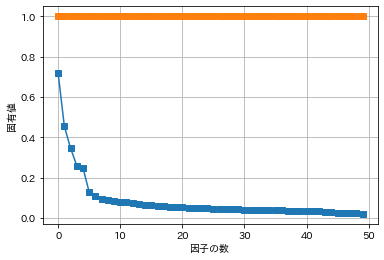

In [26]:
# 基準線(固有値1)をひくためのダミーデータ
ev_1 = np.ones(50)

# 変数を指定
plt.plot(ev, 's-')   # 主成分分析による固有値
plt.plot(ev_1, 's-') # ダミーデータ

# 軸名を指定
plt.xlabel("因子の数")
plt.ylabel("固有値")

plt.grid()
plt.show()

In [27]:
# 寄与率の取得
evr = pca.explained_variance_ratio_

# 行名･列名を付与してデータフレームに変換
pd.DataFrame(evr, 
             index=["PC{}".format(x + 1) for x in range(len(df.columns))], 
             columns=["寄与率"])

寄与率
PC1   0.166476
PC2   0.105389
PC3   0.080256
PC4   0.060239
PC5   0.057476
PC6   0.029575
PC7   0.025692
PC8   0.022306
PC9   0.020334
PC10  0.019277
PC11  0.018877
PC12  0.017943
PC13  0.017014
PC14  0.015665
PC15  0.015197
PC16  0.015041
PC17  0.013937
PC18  0.013651
PC19  0.013005
PC20  0.012754
PC21  0.012411
PC22  0.011974
PC23  0.011765
PC24  0.011298
PC25  0.010942
PC26  0.010420
PC27  0.010345
PC28  0.010244
PC29  0.009859
PC30  0.009722
PC31  0.009514
PC32  0.009440
PC33  0.009256
PC34  0.009066
PC35  0.009002
PC36  0.008747
PC37  0.008593
PC38  0.008391
PC39  0.008039
PC40  0.007852
PC41  0.007648
PC42  0.007531
PC43  0.007394
PC44  0.006850
PC45  0.006307
PC46  0.005937
PC47  0.005727
PC48  0.005609
PC49  0.005428
PC50  0.004586

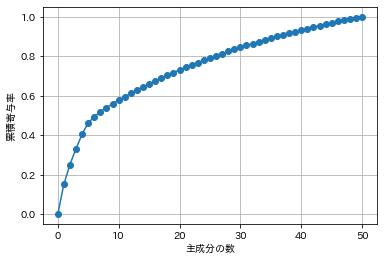

In [37]:
# 起点0と寄与率の累積値をプロット
plt.plot([0] + list(np.cumsum(evr)), "-o")

plt.xlabel("主成分の数")
plt.ylabel("累積寄与率")

plt.grid()
plt.show()


## Model selection with Probabilistic PCA and Factor Analysis (FA)
https://scikit-learn.org/stable/auto_examples/decomposition/plot_pca_vs_fa_model_selection.html#sphx-glr-auto-examples-decomposition-plot-pca-vs-fa-model-selection-py
https://pypi.org/project/factor-analyzer/
https://github.com/java-lang-programming/python_sample/blob/master/statistics/factor_analysis/%E5%9B%A0%E5%AD%90%E5%88%86%E6%9E%90.ipynb


In [28]:
from factor_analyzer import FactorAnalyzer

n_factors=5

fa_model = FactorAnalyzer(n_factors=n_factors, method='ml', rotation='promax', impute='drop')
fa_model.fit(df_sample)
fa_model.loadings_

array([[ 7.36009351e-01,  5.48059315e-02, -1.37401635e-02,
        -3.23878386e-02,  4.14639389e-04],
       [-7.27516256e-01, -8.40322184e-02, -5.33314157e-02,
         5.37942413e-03,  1.04730727e-02],
       [ 6.17773163e-01, -1.55250192e-01,  1.79557547e-01,
         6.53257738e-02, -8.53617286e-02],
       [-7.71754040e-01, -2.25254181e-03,  3.65024597e-02,
        -3.45662444e-02,  2.84025417e-02],
       [ 7.13209436e-01,  3.07175428e-02,  1.47288383e-01,
         6.50068564e-02,  1.05701910e-02],
       [-5.35606698e-01, -1.14370112e-02, -9.17854763e-02,
        -3.89444644e-02, -1.87043251e-01],
       [ 7.34041646e-01,  4.72978044e-03,  6.72937521e-02,
        -1.45788932e-02, -2.35810909e-02],
       [-6.11311627e-01, -1.49110218e-02,  1.00940761e-01,
         7.70918422e-02, -3.36608168e-02],
       [ 6.46291733e-01,  2.55172873e-02, -1.00681796e-01,
        -4.39417810e-02,  9.87976887e-02],
       [-6.81048348e-01,  7.11373491e-02, -1.56350061e-03,
        -2.83787635e-02

In [29]:
# csvで出力
pd.DataFrame(fa_model.loadings_, index=columns).to_csv('./result.csv')

In [30]:
df_result = pd.read_csv('./result.csv')
df_result

Unnamed: 0         0         1         2         3         4
0        EXT1  0.736009  0.054806 -0.013740 -0.032388  0.000415
1        EXT2 -0.727516 -0.084032 -0.053331  0.005379  0.010473
2        EXT3  0.617773 -0.155250  0.179558  0.065326 -0.085362
3        EXT4 -0.771754 -0.002253  0.036502 -0.034566  0.028403
4        EXT5  0.713209  0.030718  0.147288  0.065007  0.010570
5        EXT6 -0.535607 -0.011437 -0.091785 -0.038944 -0.187043
6        EXT7  0.734042  0.004730  0.067294 -0.014579 -0.023581
7        EXT8 -0.611312 -0.014911  0.100941  0.077092 -0.033661
8        EXT9  0.646292  0.025517 -0.100682 -0.043942  0.098798
9       EXT10 -0.681048  0.071137 -0.001564 -0.028379  0.048014
10       EST1 -0.014001  0.722186  0.087623  0.103790 -0.067569
11       EST2  0.012198 -0.595893 -0.022488 -0.135696  0.048257
12       EST3 -0.089381  0.640141  0.182795  0.115324 -0.027129
13       EST4  0.099467 -0.380270 -0.053304  0.047724 -0.069461
14       EST5  0.035666  0.493573  0.016733 -0.009697 -0.117093
15       EST6  0.041529  0.745143  0.032994  0.040642 -0.073130
16       EST7  0.110281  0.730776 -0.035825 -0.076821  0.022188
17       EST8  0.103751  0.740682 -0.044876 -0.094446  0.037799
18       EST9  0.098536  0.719983 -0.170380  0.060224 -0.030562
19      EST10 -0.175878  0.575038  0.009323 -0.127879  0.069005
20       AGR1  0.079530  0.054780 -0.521752  0.042319 -0.022421
21       AGR2  0.270869 -0.011115  0.537649 -0.050189  0.022803
22       AGR3  0.184928  0.239692 -0.409899 -0.166090  0.079637
23       AGR4 -0.057328  0.068543  0.810616 -0.039827 -0.029406
24       AGR5 -0.060832 -0.010571 -0.685818  0.075242  0.034484
25       AGR6 -0.045621  0.164004  0.621078  0.004266 -0.063732
26       AGR7 -0.211704  0.042249 -0.617415  0.064103  0.011722
27       AGR8  0.070907  0.005802  0.567585  0.018900 -0.017052
28       AGR9  0.024930  0.132729  0.709359 -0.018772  0.022259
29      AGR10  0.299001 -0.081819  0.318366  0.079963  0.044618
30       CSN1  0.030487  0.029368 -0.071100  0.666992  0.031714
31       CSN2  0.076415  0.020373  0.081274 -0.550868  0.089950
32       CSN3 -0.068793  0.073675  0.021463  0.386345  0.260680
33       CSN4 -0.006609  0.264919  0.015089 -0.553164  0.034952
34       CSN5  0.072583  0.007647 -0.009705  0.624657 -0.074936
35       CSN6  0.041506  0.088045  0.020917 -0.576456  0.077344
36       CSN7 -0.021717  0.161925 -0.045884  0.595005 -0.053400
37       CSN8 -0.001205  0.132842 -0.106417 -0.472699 -0.012149
38       CSN9  0.078334  0.140105  0.021145  0.652525 -0.093031
39      CSN10  0.021583  0.062456 -0.017526  0.474061  0.207046
40       OPN1  0.030205 -0.004825 -0.088829  0.032902  0.541372
41       OPN2  0.072964  0.200490 -0.008780  0.067883 -0.544193
42       OPN3  0.002652  0.110213  0.056083 -0.115756  0.599613
43       OPN4  0.095447  0.114077 -0.103509  0.122611 -0.505199
44       OPN5  0.171653 -0.024585 -0.103414  0.137227  0.584278
45       OPN6 -0.027892  0.032272 -0.062678  0.053796 -0.573923
46       OPN7  0.001046 -0.132058 -0.064552  0.114676  0.457036
47       OPN8  0.067124  0.098687 -0.141919 -0.018807  0.507224
48       OPN9 -0.177727  0.135832  0.196095  0.029433  0.313057
49      OPN10  0.143844  0.019927 -0.027012 -0.007116  0.679491

In [31]:
trans= fa_model.transform(df_sample)

In [32]:
print(trans)

[[ 1.68798184 -0.98317429  0.13093619  0.88793114 -0.06510646]
 [-1.05684234 -0.74832091  0.99551359 -0.59573548  0.47666761]
 [-0.57165041 -0.75529203  0.53839776  0.08987285  0.32733162]
 ...
 [ 0.59308106 -0.41970374 -0.75108058  0.96016132  0.57537162]
 [-0.3981889   1.15106714 -0.33692037  0.1651596   1.27553848]
 [ 0.585097   -1.43356373 -1.51058293  0.40587127  1.24485758]]


In [33]:
trans_pd = pd.DataFrame(trans)
trans_pd.head

<bound method NDFrame.head of              0         1         2         3         4
0     1.687982 -0.983174  0.130936  0.887931 -0.065106
1    -1.056842 -0.748321  0.995514 -0.595735  0.476668
2    -0.571650 -0.755292  0.538398  0.089873  0.327332
3    -0.284146 -0.236214 -0.070817  0.094767 -1.163582
4     0.007874 -1.303953  1.300944  1.490522  1.884232
...        ...       ...       ...       ...       ...
4995  0.012486  1.656543  0.499405  0.438448 -0.256080
4996 -0.248512 -0.145849  0.600046 -0.835239 -0.562000
4997  0.593081 -0.419704 -0.751081  0.960161  0.575372
4998 -0.398189  1.151067 -0.336920  0.165160  1.275538
4999  0.585097 -1.433564 -1.510583  0.405871  1.244858

[5000 rows x 5 columns]>

## 階層的クラスタリング
https://qiita.com/maskot1977/items/4db7976a987a057ad3ba

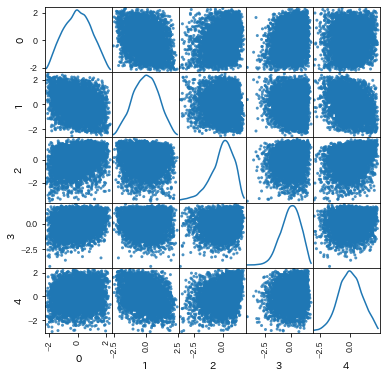

In [34]:
import matplotlib.pyplot as plt
%matplotlib inline
from pandas import plotting
plotting.scatter_matrix(trans_pd[trans_pd.columns[0:5]], figsize=(6,6), alpha=0.8, diagonal='kde')   #全体像を眺める
plt.show()

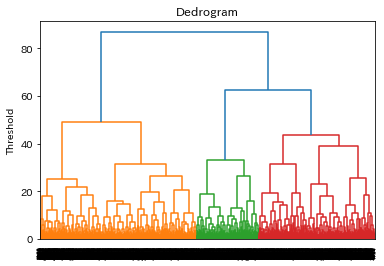

In [35]:
from scipy.cluster.hierarchy import linkage, dendrogram
result1 = linkage(trans_pd.iloc[:, 0:5], 
                  #metric = 'braycurtis', 
                  #metric = 'canberra', 
                  #metric = 'chebyshev', 
                  #metric = 'cityblock', 
                  #metric = 'correlation', 
                  #metric = 'cosine', 
                  metric = 'euclidean', 
                  #metric = 'hamming', 
                  #metric = 'jaccard', 
                  method= 'ward')
                  #method = 'average')
                  #method= 'complete')
                  #method='weighted')
dendrogram(result1)
plt.title("Dedrogram")
plt.ylabel("Threshold")
plt.show()

In [36]:
print(result1.shape)
print(result1)

(4999, 4)
[[1.91500000e+03 1.91700000e+03 0.00000000e+00 2.00000000e+00]
 [4.60600000e+03 5.00000000e+03 0.00000000e+00 3.00000000e+00]
 [4.76600000e+03 5.00100000e+03 0.00000000e+00 4.00000000e+00]
 ...
 [9.98700000e+03 9.99200000e+03 4.91648886e+01 2.34500000e+03]
 [9.99300000e+03 9.99500000e+03 6.22988945e+01 2.65500000e+03]
 [9.99600000e+03 9.99700000e+03 8.69719937e+01 5.00000000e+03]]


In [37]:
from scipy.cluster.hierarchy import fcluster

# クラスタ数を指定してクラスタリング
clusters1 = fcluster(result1, 42, criterion='distance')
for i, c in enumerate(clusters1):
    print(i, c)

0 1
1 2
2 2
3 5
4 1
5 2
6 1
7 1
8 4
9 3
10 3
11 3
12 5
13 5
14 4
15 2
16 2
17 2
18 3
19 2
20 5
21 3
22 1
23 5
24 5
25 5
26 1
27 2
28 1
29 4
30 5
31 3
32 5
33 5
34 1
35 5
36 2
37 1
38 1
39 3
40 2
41 2
42 3
43 5
44 1
45 1
46 1
47 5
48 2
49 2
50 3
51 2
52 2
53 3
54 1
55 3
56 3
57 5
58 5
59 1
60 4
61 4
62 5
63 3
64 2
65 1
66 5
67 5
68 2
69 3
70 3
71 4
72 3
73 1
74 5
75 3
76 2
77 1
78 2
79 3
80 5
81 4
82 3
83 3
84 5
85 5
86 5
87 1
88 5
89 1
90 2
91 1
92 2
93 2
94 3
95 3
96 3
97 5
98 1
99 4
100 1
101 1
102 4
103 2
104 5
105 2
106 1
107 2
108 3
109 1
110 3
111 3
112 5
113 2
114 1
115 2
116 4
117 2
118 3
119 3
120 4
121 5
122 3
123 2
124 2
125 1
126 2
127 1
128 1
129 2
130 2
131 1
132 4
133 5
134 5
135 2
136 2
137 5
138 5
139 4
140 2
141 2
142 3
143 1
144 3
145 3
146 3
147 3
148 5
149 3
150 4
151 4
152 2
153 3
154 4
155 2
156 3
157 1
158 1
159 5
160 2
161 3
162 5
163 3
164 3
165 3
166 5
167 5
168 5
169 2
170 3
171 2
172 3
173 1
174 3
175 5
176 1
177 3
178 1
179 1
180 1
181 1
182 2
183 2
184 2


2351 1
2352 3
2353 1
2354 5
2355 1
2356 4
2357 2
2358 3
2359 2
2360 5
2361 2
2362 2
2363 4
2364 4
2365 2
2366 5
2367 4
2368 2
2369 5
2370 5
2371 2
2372 2
2373 3
2374 1
2375 1
2376 2
2377 1
2378 5
2379 1
2380 4
2381 1
2382 2
2383 2
2384 5
2385 4
2386 2
2387 5
2388 2
2389 3
2390 4
2391 5
2392 5
2393 3
2394 2
2395 3
2396 1
2397 4
2398 4
2399 4
2400 2
2401 4
2402 2
2403 1
2404 3
2405 4
2406 2
2407 1
2408 5
2409 2
2410 1
2411 5
2412 2
2413 2
2414 2
2415 4
2416 2
2417 4
2418 2
2419 2
2420 3
2421 3
2422 4
2423 5
2424 3
2425 2
2426 2
2427 4
2428 3
2429 2
2430 5
2431 1
2432 2
2433 3
2434 3
2435 4
2436 1
2437 1
2438 2
2439 5
2440 4
2441 1
2442 2
2443 3
2444 5
2445 5
2446 2
2447 4
2448 1
2449 5
2450 1
2451 2
2452 2
2453 3
2454 3
2455 5
2456 3
2457 2
2458 5
2459 5
2460 2
2461 4
2462 5
2463 5
2464 2
2465 2
2466 4
2467 2
2468 3
2469 1
2470 1
2471 5
2472 1
2473 3
2474 2
2475 1
2476 3
2477 2
2478 2
2479 1
2480 2
2481 3
2482 1
2483 3
2484 2
2485 2
2486 2
2487 3
2488 2
2489 5
2490 5
2491 3
2492 2
2493 4

4351 4
4352 2
4353 5
4354 5
4355 2
4356 3
4357 1
4358 2
4359 2
4360 5
4361 3
4362 1
4363 5
4364 1
4365 5
4366 1
4367 3
4368 2
4369 3
4370 1
4371 2
4372 2
4373 2
4374 3
4375 3
4376 2
4377 5
4378 5
4379 5
4380 5
4381 5
4382 4
4383 1
4384 1
4385 4
4386 2
4387 3
4388 5
4389 1
4390 2
4391 5
4392 4
4393 5
4394 1
4395 4
4396 3
4397 5
4398 1
4399 4
4400 1
4401 2
4402 2
4403 1
4404 3
4405 3
4406 5
4407 2
4408 5
4409 3
4410 2
4411 2
4412 2
4413 1
4414 4
4415 4
4416 3
4417 4
4418 2
4419 1
4420 1
4421 2
4422 4
4423 5
4424 1
4425 5
4426 4
4427 2
4428 1
4429 3
4430 1
4431 2
4432 1
4433 2
4434 1
4435 2
4436 3
4437 1
4438 1
4439 2
4440 3
4441 3
4442 3
4443 2
4444 5
4445 1
4446 5
4447 3
4448 2
4449 1
4450 2
4451 4
4452 3
4453 1
4454 5
4455 3
4456 2
4457 2
4458 4
4459 1
4460 5
4461 4
4462 5
4463 2
4464 2
4465 5
4466 2
4467 2
4468 5
4469 2
4470 4
4471 3
4472 5
4473 2
4474 1
4475 4
4476 3
4477 5
4478 5
4479 2
4480 1
4481 3
4482 2
4483 3
4484 2
4485 3
4486 3
4487 1
4488 2
4489 4
4490 1
4491 3
4492 2
4493 2

In [38]:
print(clusters1)
df_sample['Clusters'] = clusters1
df_sample.tail()
df_clus =df_sample

[1 2 2 ... 1 5 1]


<ipython-input-38-549c373ab82d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sample['Clusters'] = clusters1


In [39]:
df_sample.Clusters.value_counts()

2    1424
5    1007
3     932
1     921
4     716
Name: Clusters, dtype: int64

In [40]:
col_list = list(df_clus)
ext = col_list[0:10]
est = col_list[10:20]
agr = col_list[20:30]
csn = col_list[30:40]
opn = col_list[40:50]

data_sums = pd.DataFrame()
data_sums['extroversion'] = df_clus[ext].sum(axis=1)/10
data_sums['neurotic'] = df_clus[est].sum(axis=1)/10
data_sums['agreeable'] = df_clus[agr].sum(axis=1)/10
data_sums['conscientious'] = df_clus[csn].sum(axis=1)/10
data_sums['open'] = df_clus[opn].sum(axis=1)/10
data_sums['clusters'] = clusters1
data_sums.groupby('clusters').mean()

extroversion  neurotic  agreeable  conscientious      open
clusters                                                            
1             0.524457  0.373941   0.557546       0.540825  0.600624
2             0.519382  0.468311   0.544277       0.533199  0.540906
3             0.518589  0.604399   0.569608       0.534603  0.591309
4             0.500489  0.593959   0.503596       0.516131  0.520601
5             0.498709  0.577259   0.532026       0.548064  0.603550

In [41]:
dataclusters = data_sums.groupby('clusters').mean()
dataclusters_err = data_sums.groupby('clusters').std()
print(dataclusters.columns) 
"/n"
print(dataclusters.iloc[:, 0])
print(dataclusters_err)
print(dataclusters_err.iloc[:, 0])

Index(['extroversion', 'neurotic', 'agreeable', 'conscientious', 'open'], dtype='object')
clusters
1    0.524457
2    0.519382
3    0.518589
4    0.500489
5    0.498709
Name: extroversion, dtype: float64
          extroversion  neurotic  agreeable  conscientious      open
clusters                                                            
1             0.078104  0.111473   0.073176       0.090829  0.076063
2             0.078472  0.126686   0.077643       0.089338  0.082049
3             0.081654  0.127004   0.080960       0.097196  0.089054
4             0.082369  0.137170   0.088402       0.099122  0.103926
5             0.093857  0.153615   0.099706       0.101712  0.086497
clusters
1    0.078104
2    0.078472
3    0.081654
4    0.082369
5    0.093857
Name: extroversion, dtype: float64


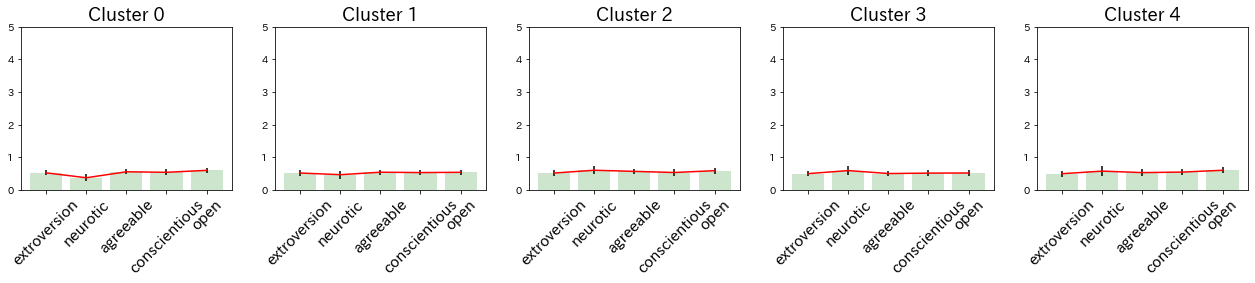

In [48]:
# Visualizing the means for each cluster
dataclusters = data_sums.groupby('clusters').mean()
plt.figure(figsize=(22,3))
error_bar_set = dict(lw = 1, capthick = 1, capsize = 20)
for i in range(0, 5):
    plt.subplot(1,5,i+1)
    plt.bar(dataclusters.columns, dataclusters.iloc[i, :], yerr = dataclusters_err.iloc[i, :], color='green', alpha=0.2)
    plt.plot(dataclusters.columns, dataclusters.iloc[i, :], color='red')
    plt.title('Cluster ' + str(i), fontsize=18)
    plt.xticks(rotation=45, fontsize=15)
    plt.ylim(0,5);

## tSNE
https://ichi.pro/t-sne-oyobi-dbscan-o-shiyoshita-koji-moto-kurasutaringu-242908181996443

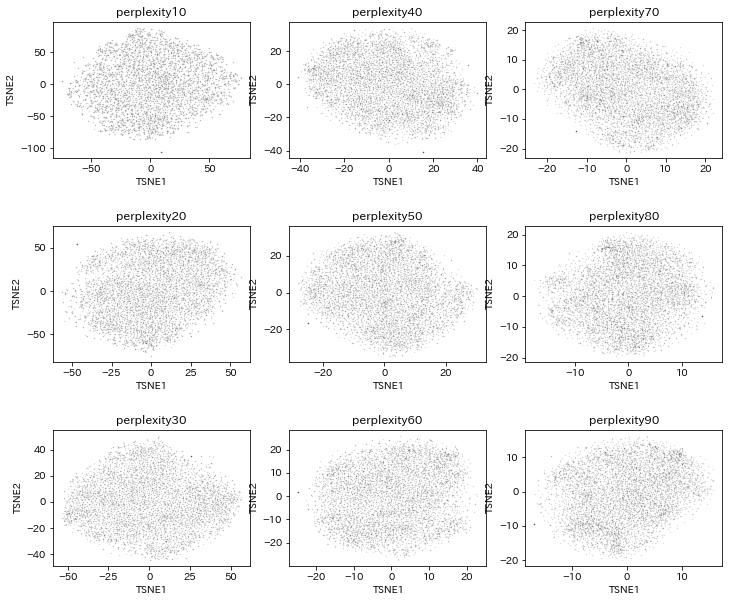

In [52]:
from sklearn.manifold import TSNE

plotx = df_sample.copy()
ps = [10,20,30,40,50,60,70,80,90]

fig,ax = plt.subplots(3,3, figsize=(12,10))
plt.subplots_adjust(hspace=.5)
import math

# the search for ideal perplexity

for  i,perplexity in enumerate(ps):
    tsne = TSNE(n_components=2, perplexity=perplexity)
    tsneComponents =tsne.fit_transform(plotx)
    TSNE_Components = pd.DataFrame(tsneComponents, index=plotx.index)
    
    ax[i%3][math.floor(i/3)].set_title(f'perplexity{perplexity}')#.floor切り下げ
    ax[i%3][math.floor(i/3)].scatter(TSNE_Components[0], TSNE_Components[1],alpha=.2, color='black', s=0.1)
    ax[i%3][math.floor(i/3)].set(xlabel = 'TSNE1')
    ax[i%3][math.floor(i/3)].set(ylabel = 'TSNE2')

In [46]:
print(plotx)

      EXT1  EXT2  EXT3  EXT4  EXT5  EXT6  EXT7  EXT8  EXT9  EXT10  EST1  EST2  \
0      4.0   1.0   5.0   2.0   5.0   1.0   5.0   2.0   4.0    1.0   1.0   4.0   
1      3.0   5.0   3.0   4.0   3.0   3.0   2.0   5.0   1.0    5.0   2.0   3.0   
2      2.0   3.0   4.0   4.0   3.0   2.0   1.0   3.0   2.0    5.0   4.0   4.0   
3      2.0   2.0   2.0   3.0   4.0   2.0   2.0   4.0   1.0    4.0   3.0   3.0   
4      3.0   3.0   3.0   3.0   5.0   3.0   3.0   5.0   3.0    4.0   1.0   5.0   
...    ...   ...   ...   ...   ...   ...   ...   ...   ...    ...   ...   ...   
5832   3.0   2.0   3.0   3.0   3.0   3.0   4.0   3.0   4.0    5.0   5.0   1.0   
5833   3.0   3.0   3.0   4.0   3.0   2.0   2.0   3.0   3.0    4.0   4.0   4.0   
5834   5.0   3.0   4.0   4.0   4.0   3.0   4.0   2.0   5.0    4.0   3.0   2.0   
5835   4.0   3.0   5.0   5.0   4.0   5.0   1.0   5.0   5.0    5.0   5.0   3.0   
5837   3.0   1.0   3.0   2.0   3.0   1.0   2.0   3.0   5.0    4.0   2.0   4.0   

      EST3  EST4  EST5  EST

In [56]:
print(ax)

[[<AxesSubplot:title={'center':'perplexity10'}, xlabel='TSNE1', ylabel='TSNE2'>
  <AxesSubplot:title={'center':'perplexity40'}, xlabel='TSNE1', ylabel='TSNE2'>
  <AxesSubplot:title={'center':'perplexity70'}, xlabel='TSNE1', ylabel='TSNE2'>]
 [<AxesSubplot:title={'center':'perplexity20'}, xlabel='TSNE1', ylabel='TSNE2'>
  <AxesSubplot:title={'center':'perplexity50'}, xlabel='TSNE1', ylabel='TSNE2'>
  <AxesSubplot:title={'center':'perplexity80'}, xlabel='TSNE1', ylabel='TSNE2'>]
 [<AxesSubplot:title={'center':'perplexity30'}, xlabel='TSNE1', ylabel='TSNE2'>
  <AxesSubplot:title={'center':'perplexity60'}, xlabel='TSNE1', ylabel='TSNE2'>
  <AxesSubplot:title={'center':'perplexity90'}, xlabel='TSNE1', ylabel='TSNE2'>]]


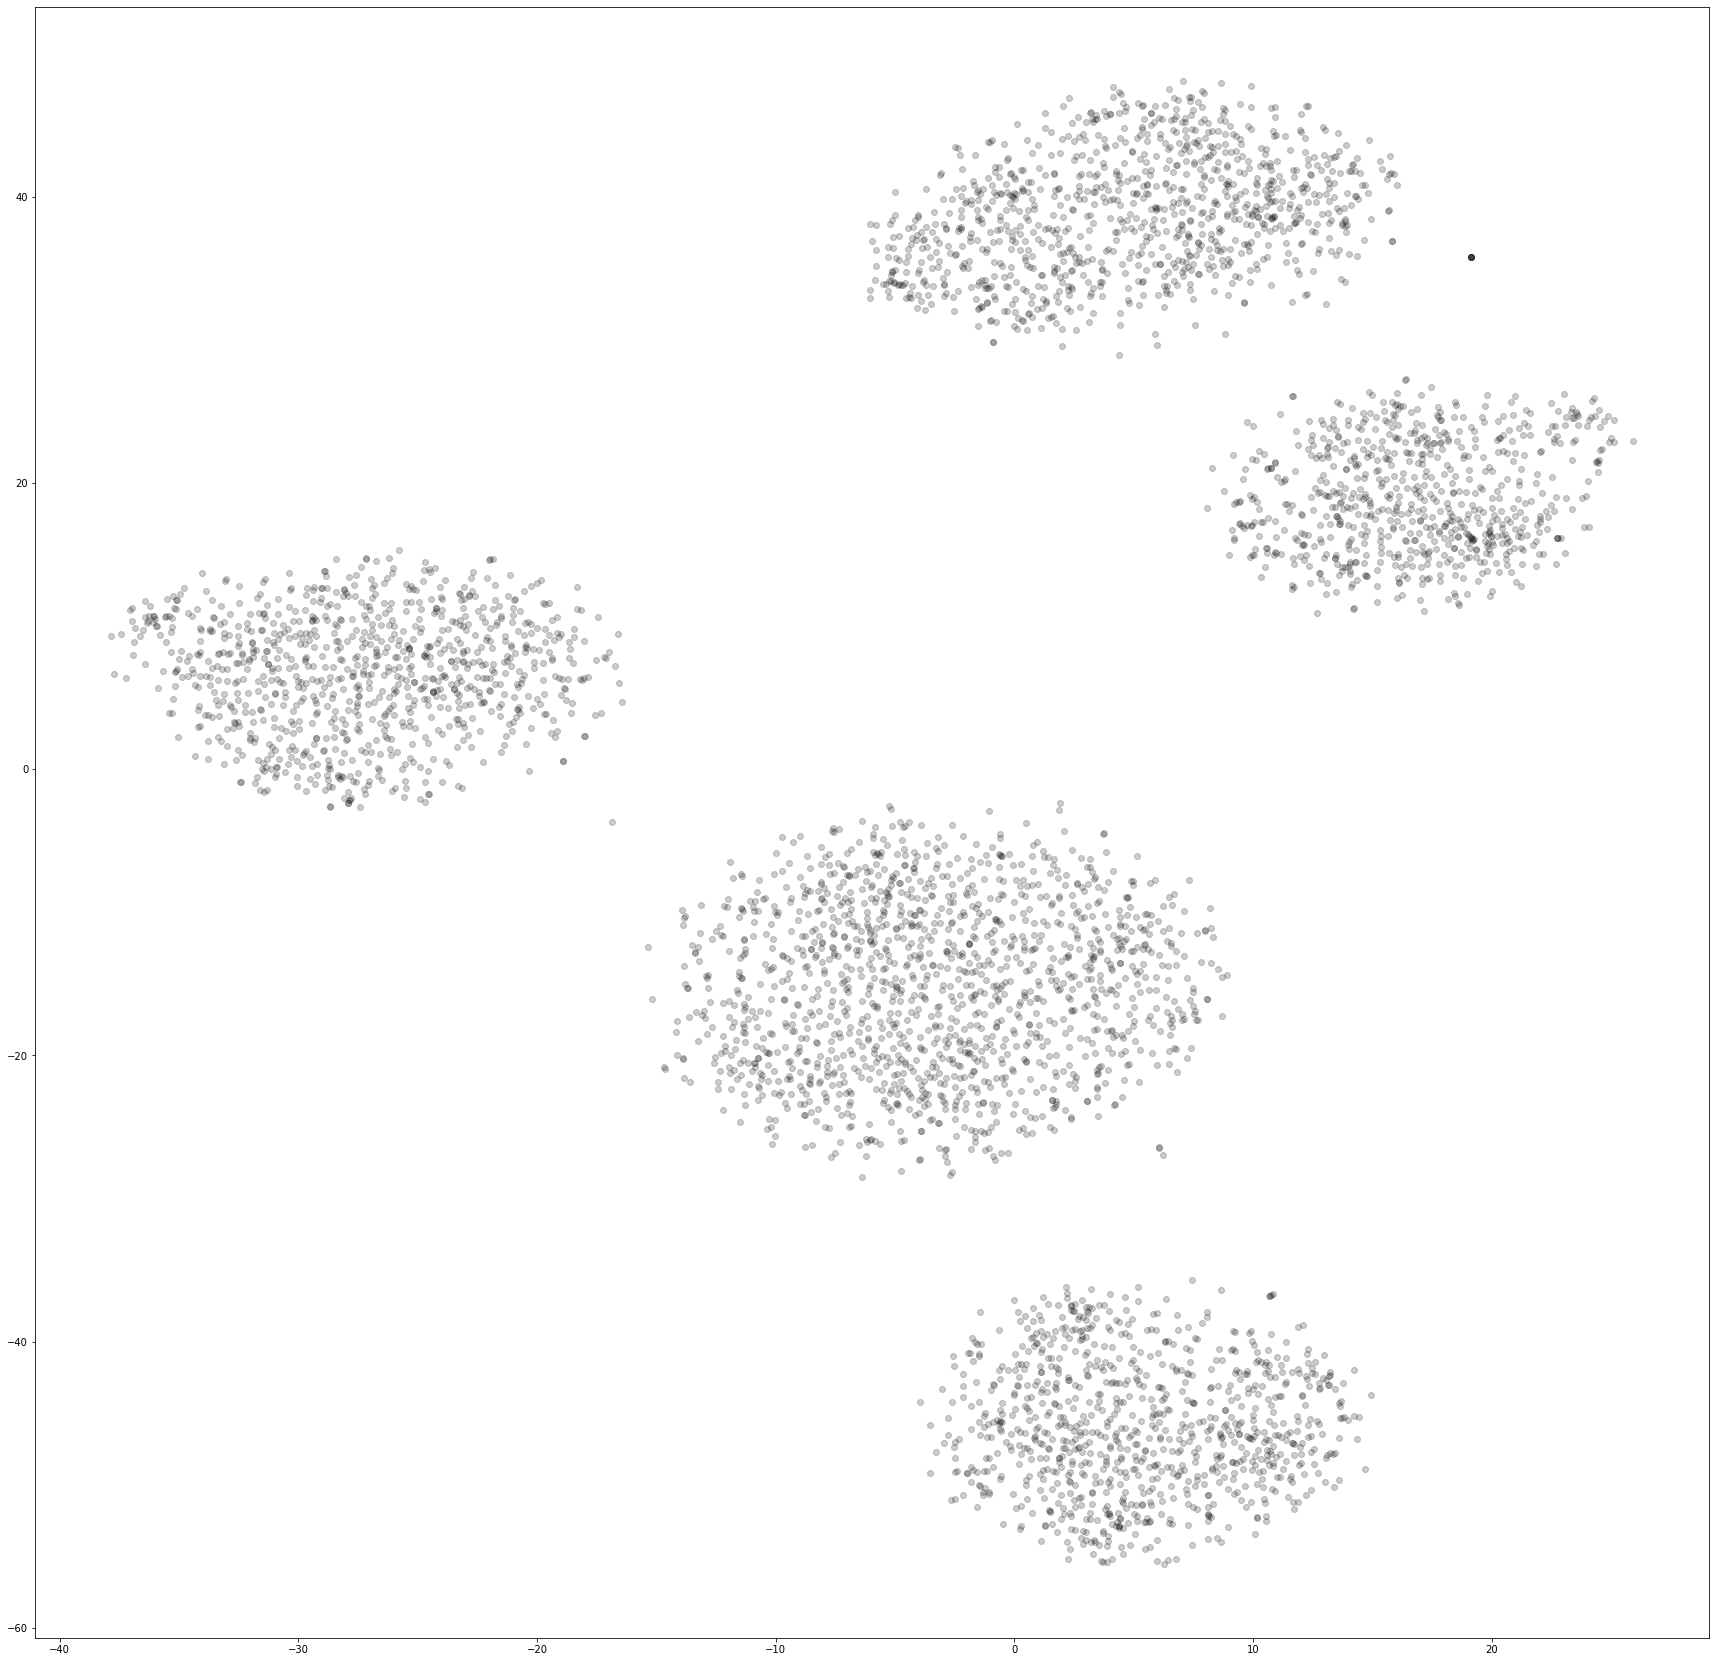

In [37]:
plt.figure(figsize = (30, 30))
tsne2 = TSNE(n_components=2, perplexity=50)
tsneComponents2 =tsne2.fit_transform(plotx)
TSNE_Components2 = pd.DataFrame(tsneComponents2, index=plotx.index)
plt.scatter(TSNE_Components2[0], TSNE_Components2[1],alpha=.2, color='black')

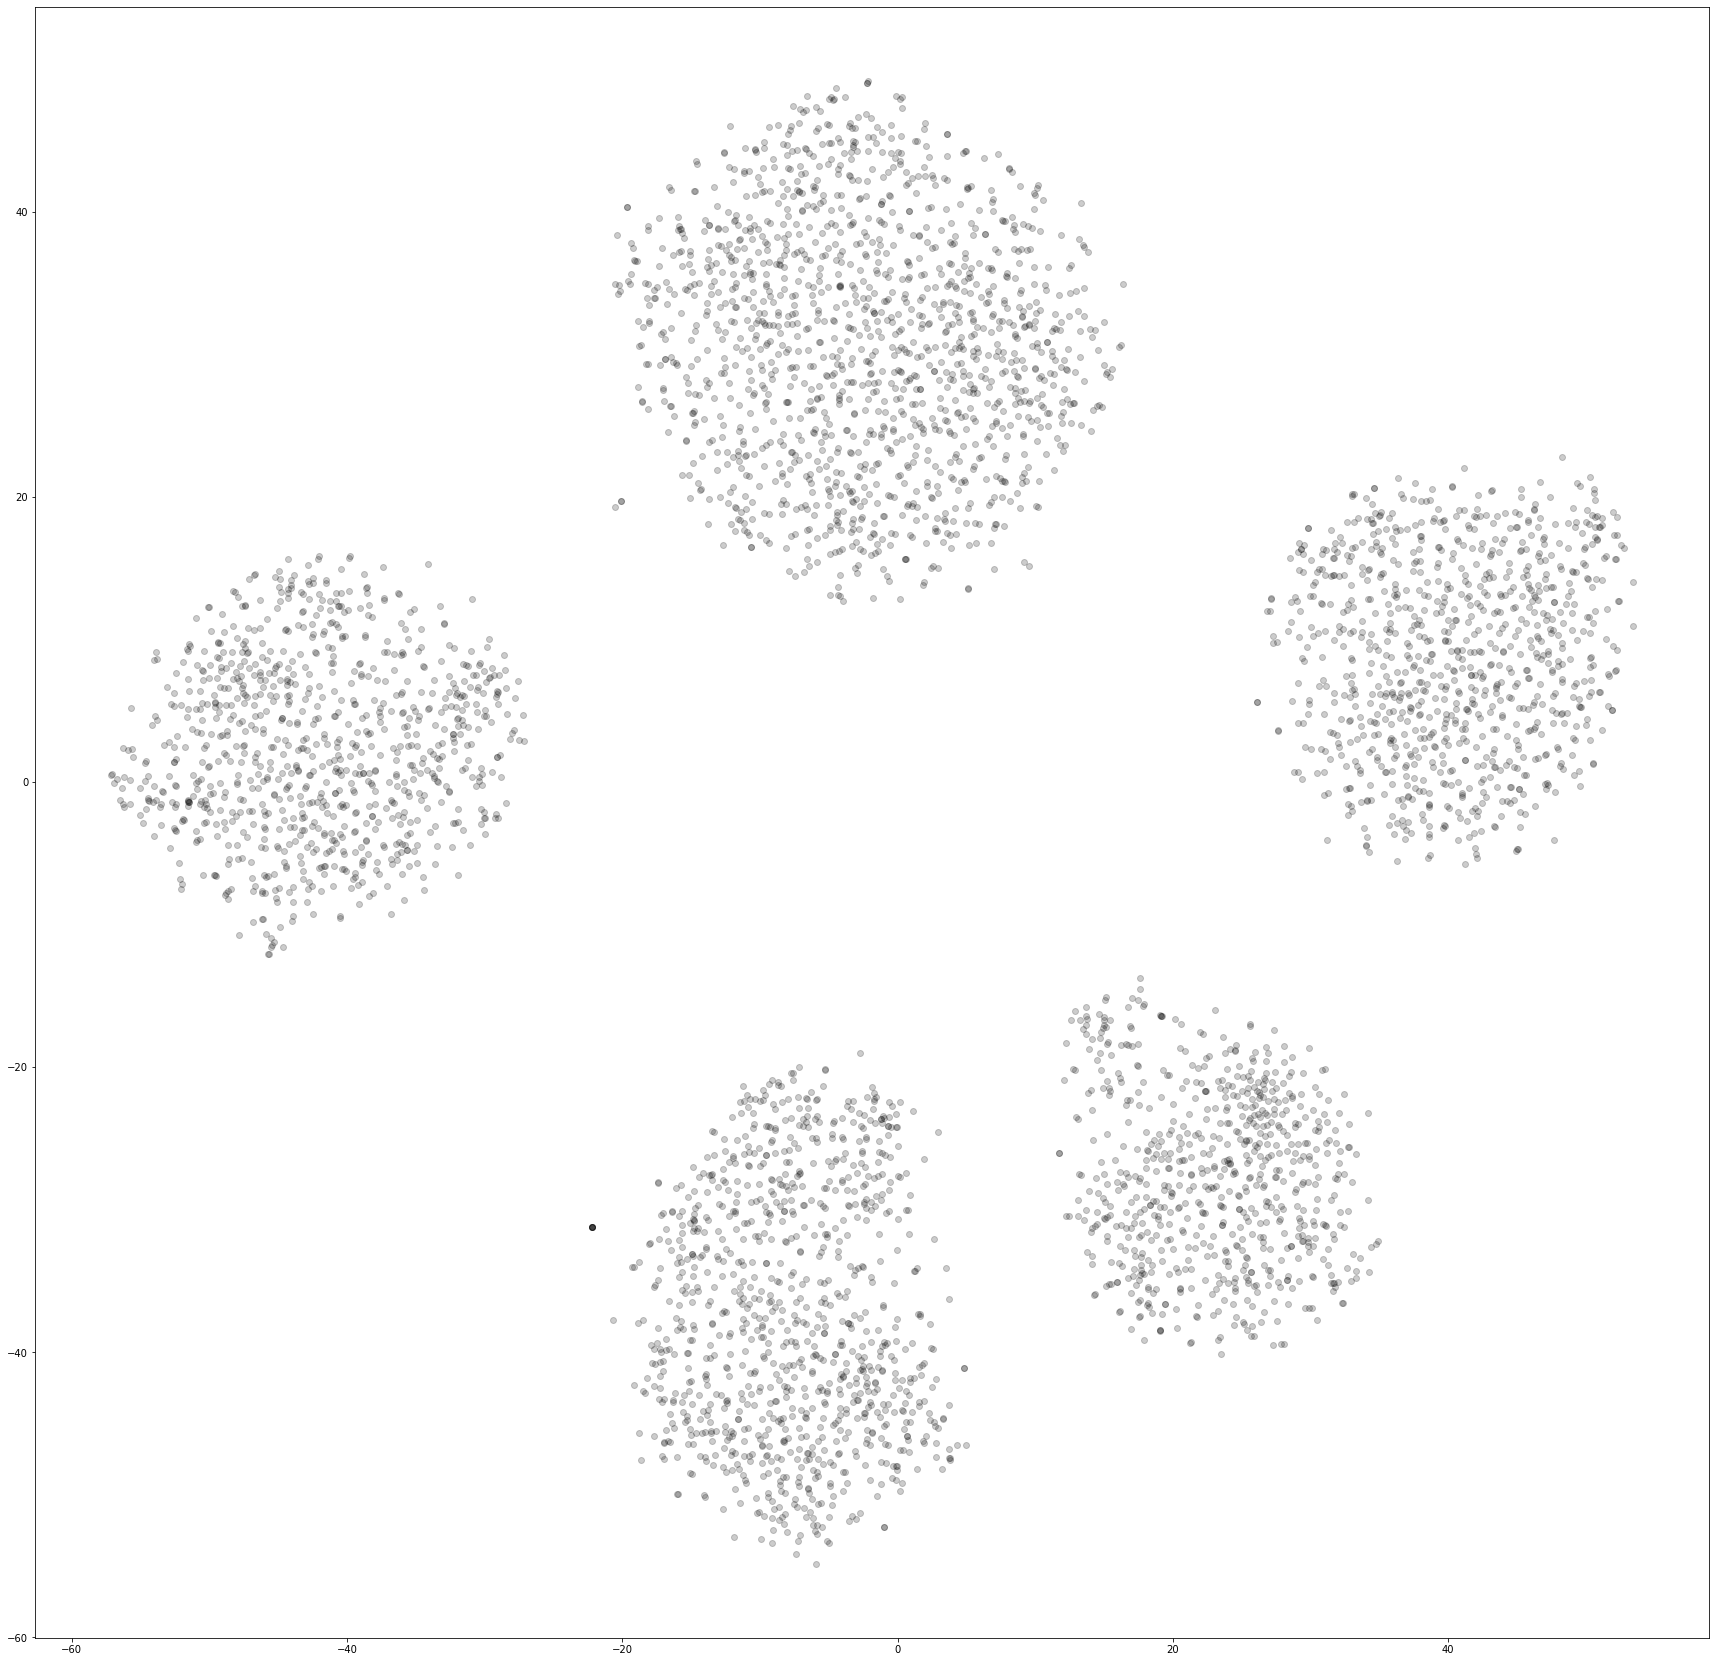

In [34]:
plt.figure(figsize = (30, 30))
tsne3 = TSNE(n_components=2, perplexity=30)
tsneComponents3 =tsne3.fit_transform(plotx)
TSNE_Components3 = pd.DataFrame(tsneComponents3, index=plotx.index)
plt.scatter(TSNE_Components3[0], TSNE_Components3[1],alpha=.2, color='black')

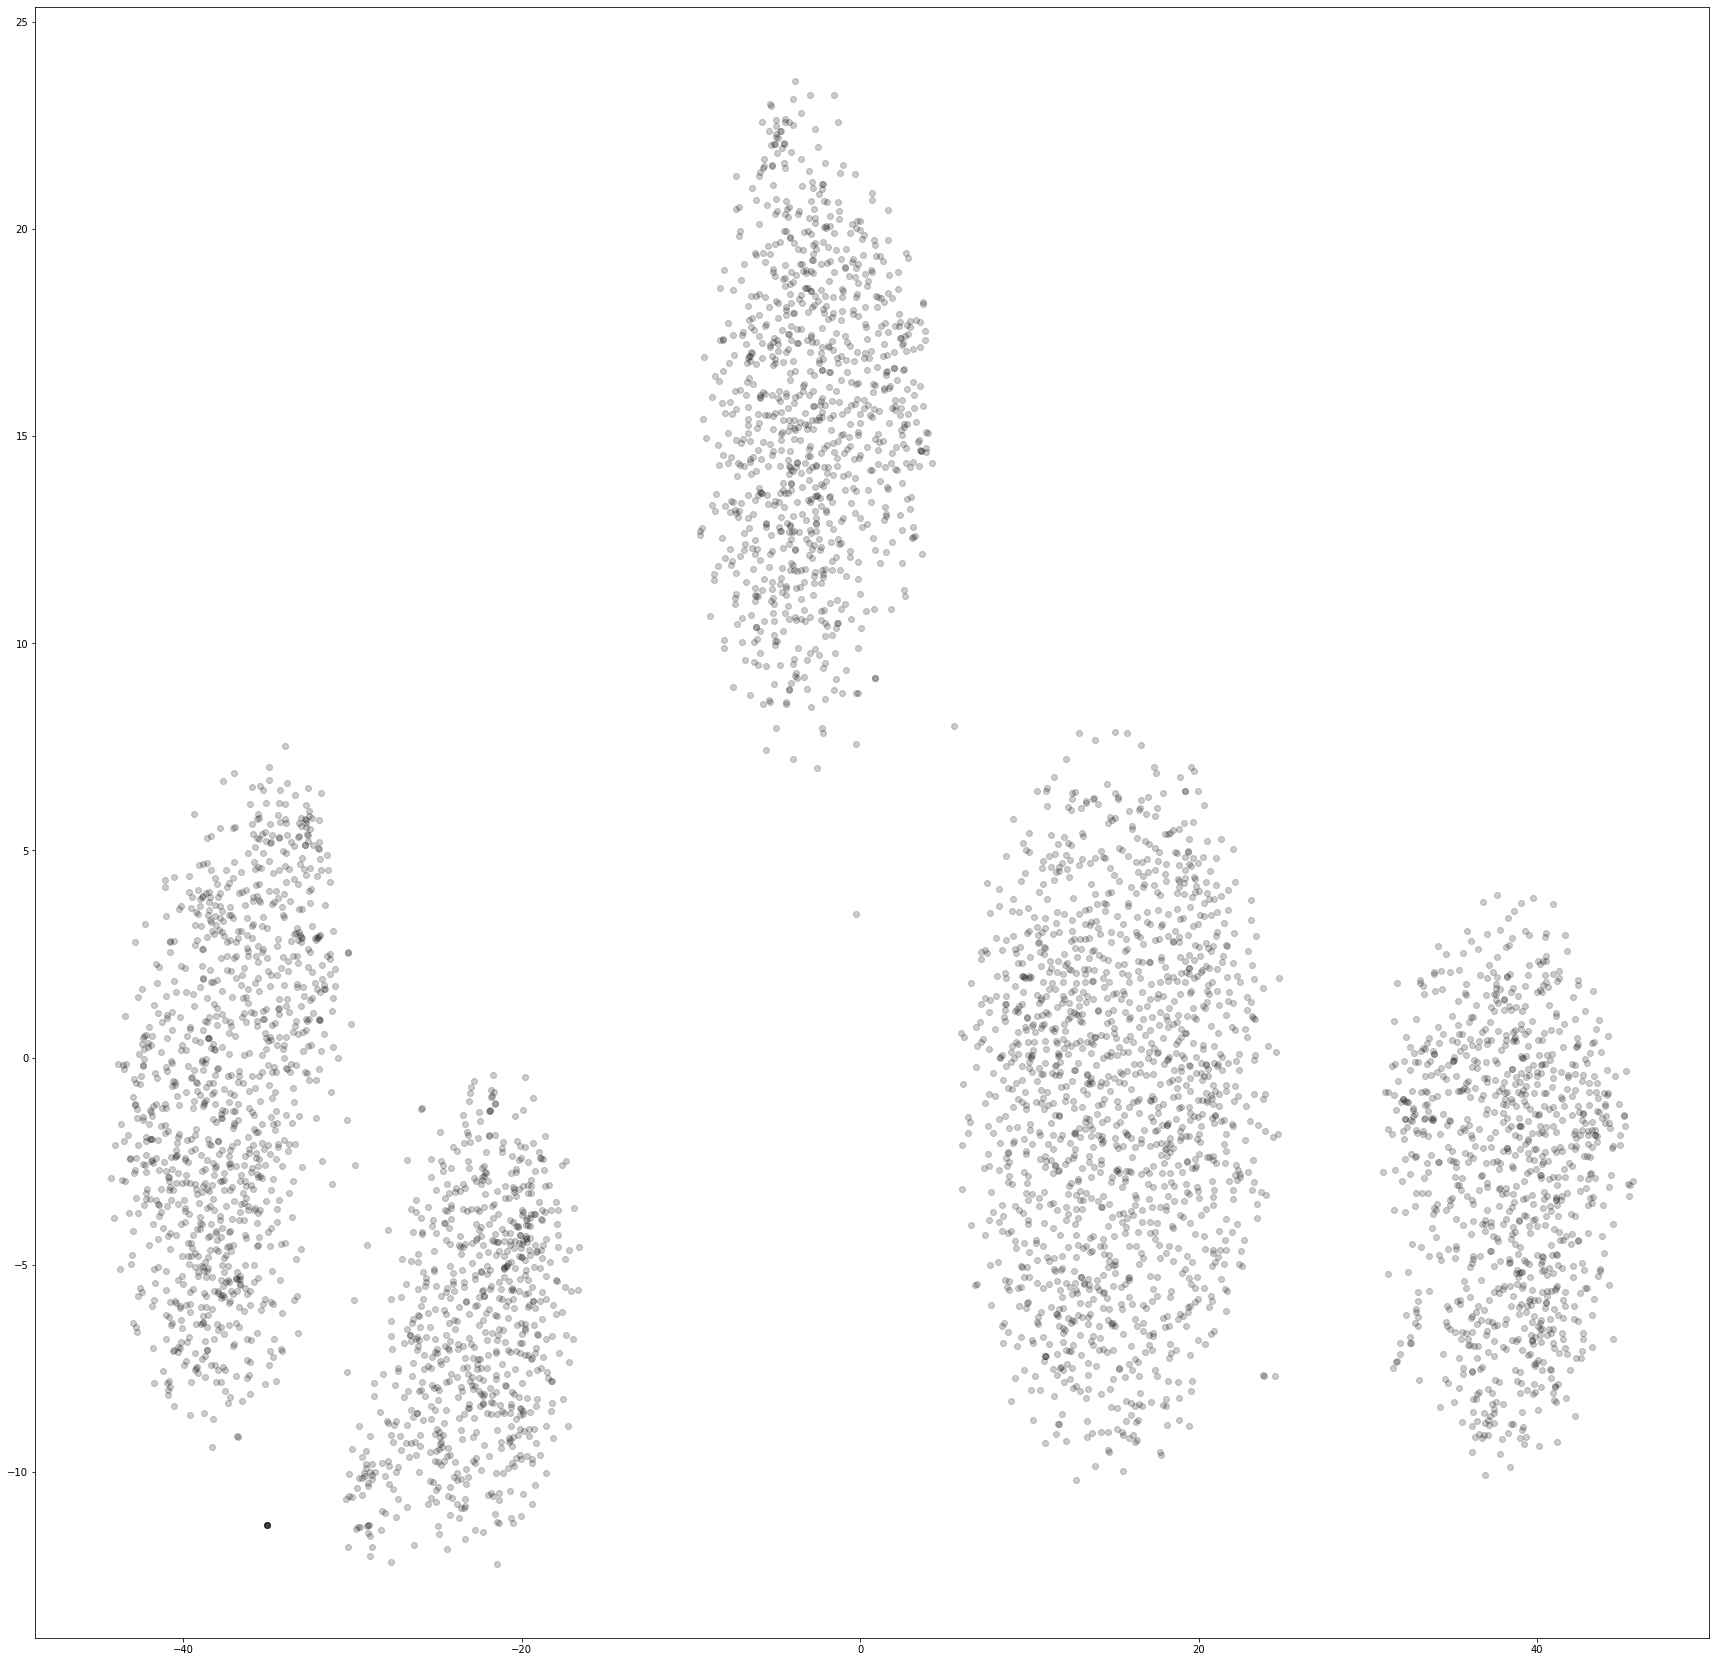

In [38]:
plt.figure(figsize = (30, 30))
tsne4 = TSNE(n_components=2, perplexity=80)
tsneComponents4 =tsne4.fit_transform(plotx)
TSNE_Components4 = pd.DataFrame(tsneComponents4, index=plotx.index)
plt.scatter(TSNE_Components4[0], TSNE_Components4[1],alpha=.2, color='black')

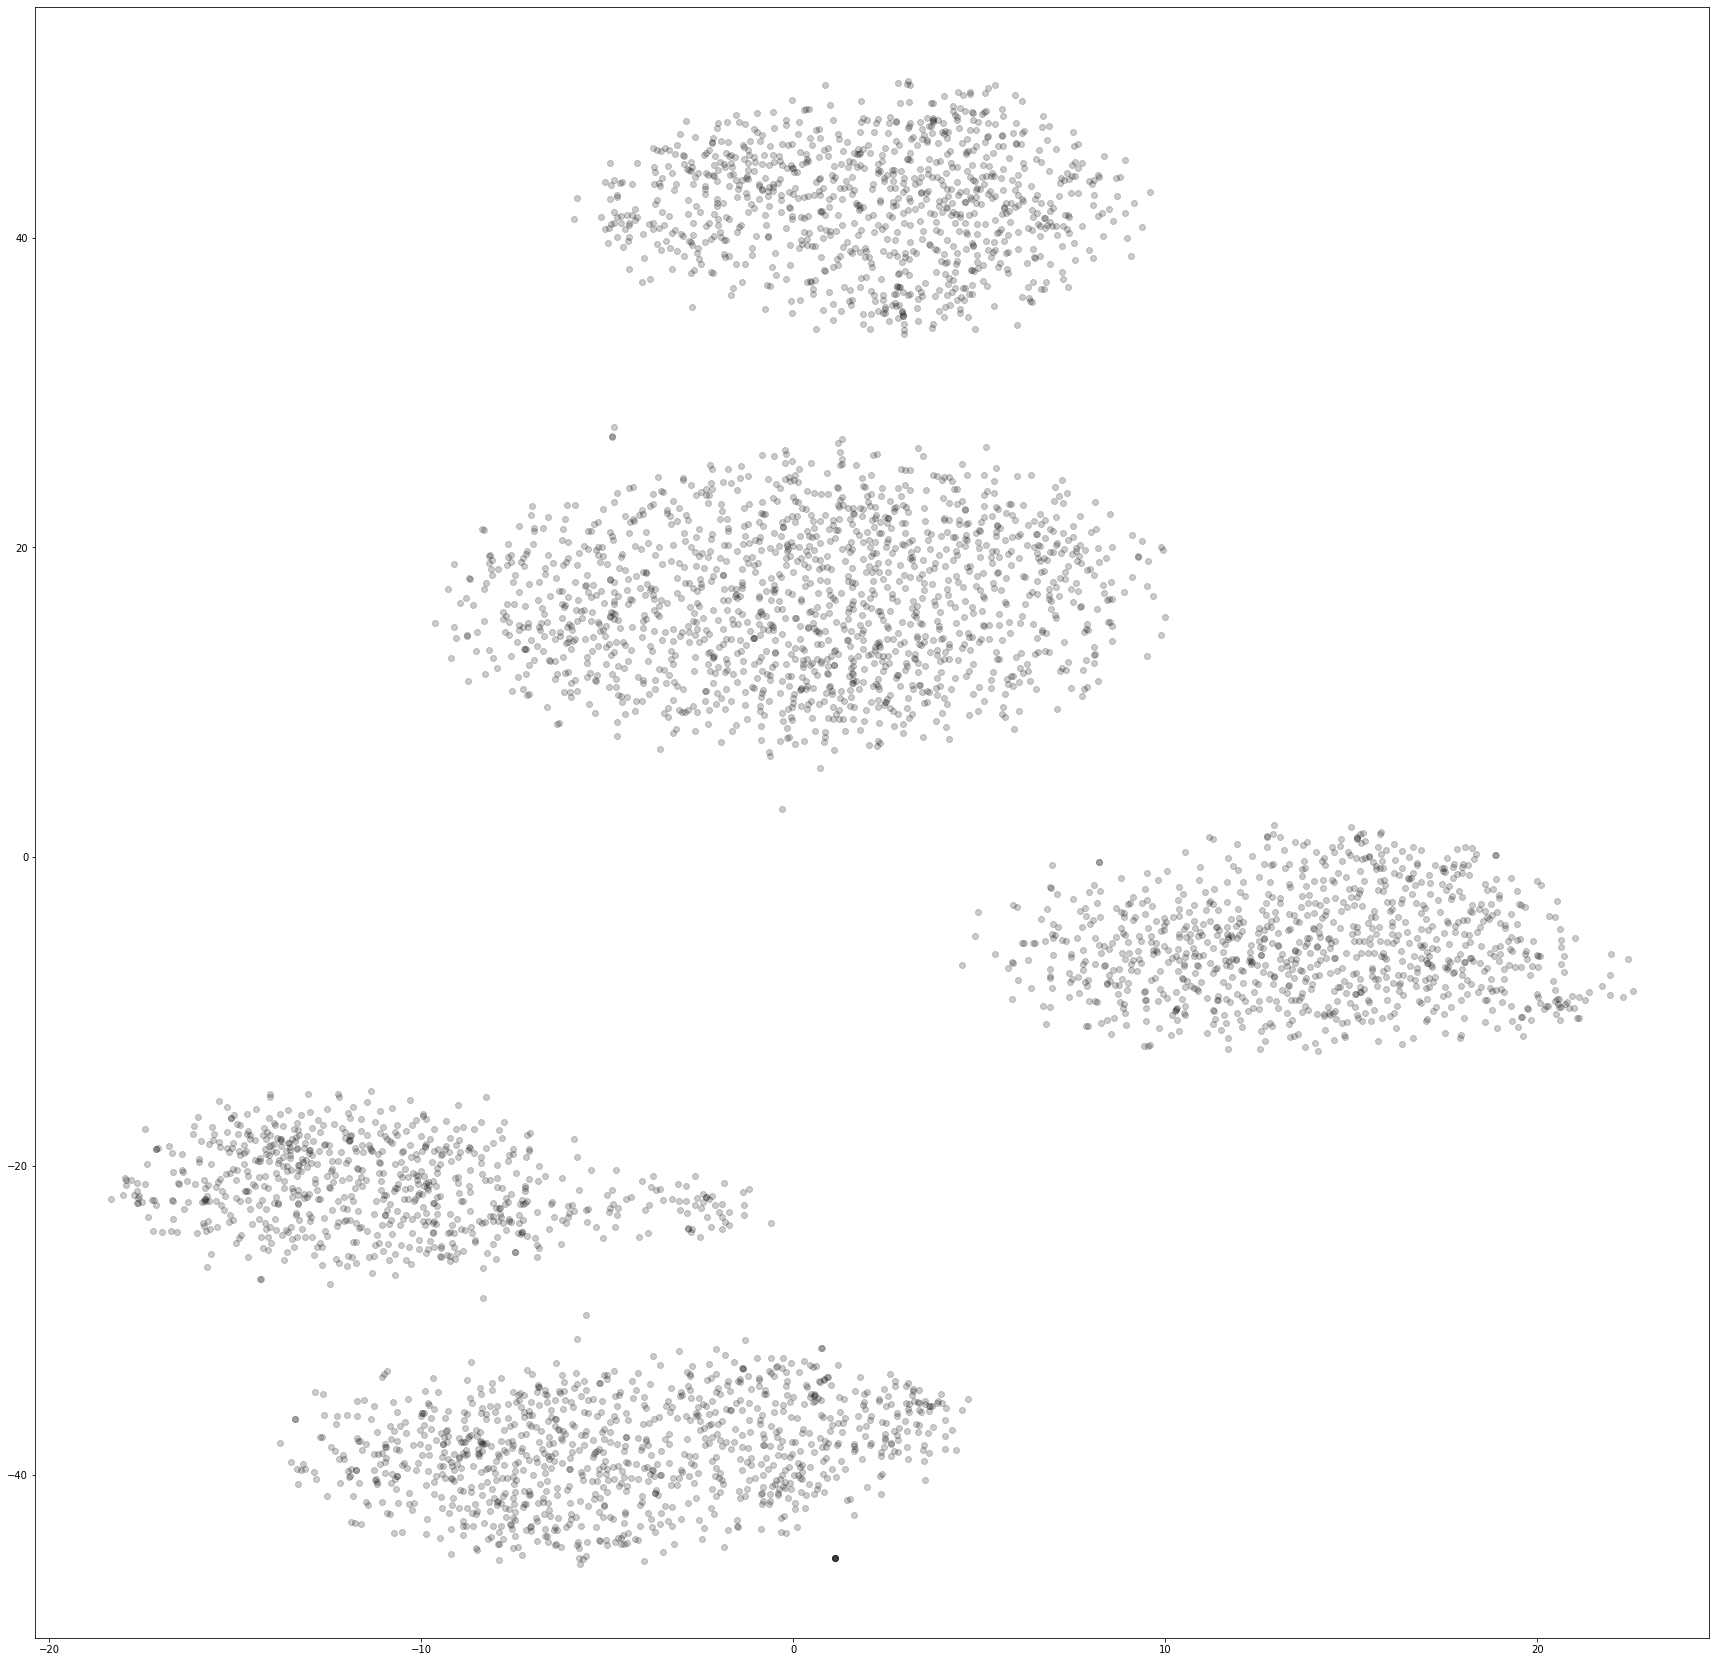

In [39]:
plt.figure(figsize = (30, 30))
tsne5 = TSNE(n_components=2, perplexity=70)
tsneComponents5 =tsne5.fit_transform(plotx)
TSNE_Components5 = pd.DataFrame(tsneComponents5, index=plotx.index)
plt.scatter(TSNE_Components5[0], TSNE_Components5[1],alpha=.2, color='black')

## DBSCAN

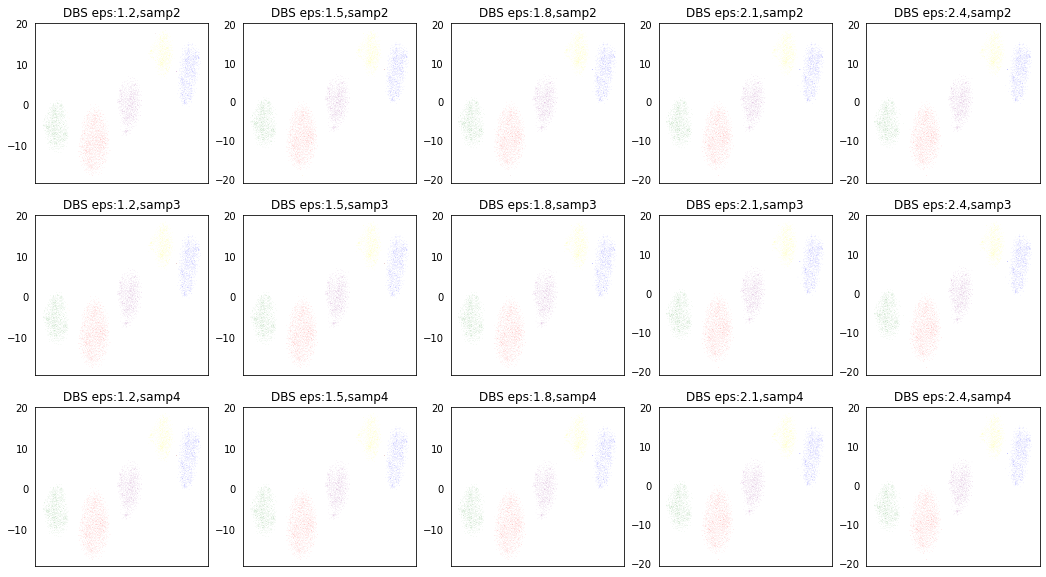

In [35]:
from sklearn.cluster import DBSCAN
from itertools import product

samp_list = [2,3,4]
eps_list = [1.2, 1.5, 1.8, 2.1, 2.4]
rows = len(samp_list)

fig,ax = plt.subplots(len(samp_list),len(eps_list), figsize=(18,10))

for k,(eps,samp) in enumerate(product(eps_list,samp_list)):
    ax[k%rows][math.floor(k/rows)].tick_params(axis='both',which='both',bottom=False,top=False,left=False,labelbottom=False)
    
    TSNE_df = TSNE_Components.copy()
    clustering = DBSCAN(eps=eps, min_samples=samp).fit(TSNE_df)
    TSNE_df.insert(0, 'cluster', clustering.labels_)
    
    datas = [[TSNE_df[TSNE_df['cluster']==i][j] for j in range(2)] for i in range(len(set(clustering.labels_)))]
    colors = ('green','red','blue','yellow','purple', 'brown','orange','purple')
    groups = [str(i) for i in range(len(set(clustering.labels_)))]
    
    for  data,color,group in zip(datas, colors, groups):
        ax[k%rows][math.floor(k/rows)].scatter(data[0], data[1], alpha=0.5, c=color, edgecolor='none', s=0.1, label=group)
        ax[k%rows][math.floor(k/rows)].set_title(f'DBS eps:{eps},samp{samp}')

In [68]:
TSNE_Components.head()

0         1
0 -11.696626 -2.411818
1  -0.015623  8.982078
2  -1.215398  8.333543
3   3.453738  3.248068
4  -9.411094  7.609659

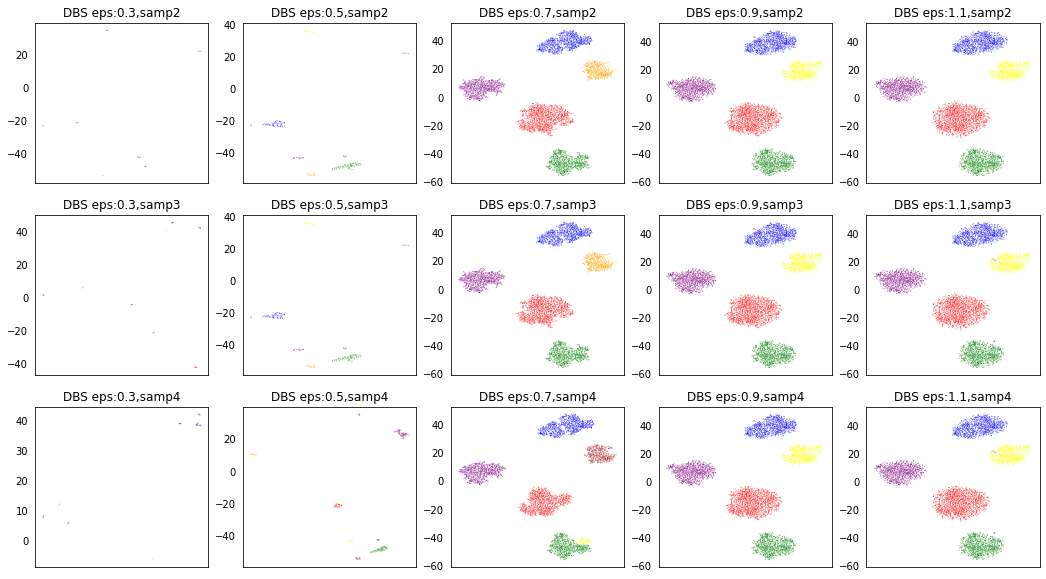

In [40]:
from sklearn.cluster import DBSCAN
from itertools import product

samp_list = [2,3,4]
eps_list = [0.3,0.5,0.7,0.9,1.1]
rows = len(samp_list)

fig,ax = plt.subplots(len(samp_list),len(eps_list), figsize=(18,10))

for k,(eps,samp) in enumerate(product(eps_list,samp_list)):
    ax[k%rows][math.floor(k/rows)].tick_params(axis='both',which='both',bottom=False,top=False,left=False,labelbottom=False)
    
    TSNE_df = TSNE_Components2.copy()
    clustering = DBSCAN(eps=eps, min_samples=samp).fit(TSNE_df)
    TSNE_df.insert(0, 'cluster', clustering.labels_)
    
    datas = [[TSNE_df[TSNE_df['cluster']==i][j] for j in range(2)] for i in range(len(set(clustering.labels_)))]
    colors = ('green','red','blue','yellow','purple', 'brown','orange','purple')
    groups = [str(i) for i in range(len(set(clustering.labels_)))]
    
    for  data,color,group in zip(datas, colors, groups):
        ax[k%rows][math.floor(k/rows)].scatter(data[0], data[1], alpha=0.5, c=color, edgecolor='none', s=1, label=group)
        ax[k%rows][math.floor(k/rows)].set_title(f'DBS eps:{eps},samp{samp}')

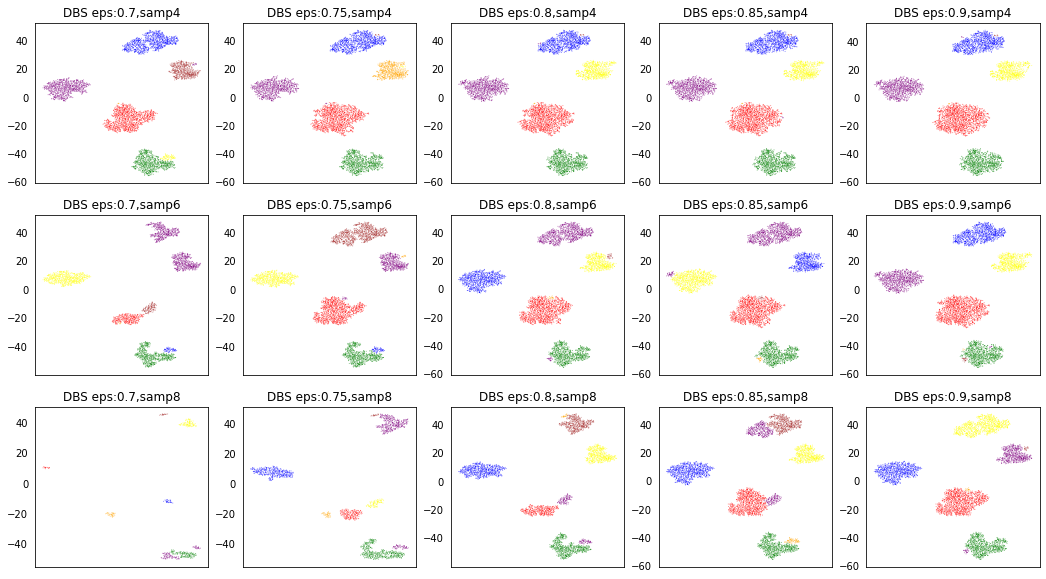

In [41]:
from sklearn.cluster import DBSCAN
from itertools import product

samp_list = [4,6,8]
eps_list = [0.7,0.75,0.8,0.85,0.9]
rows = len(samp_list)

fig,ax = plt.subplots(len(samp_list),len(eps_list), figsize=(18,10))

for k,(eps,samp) in enumerate(product(eps_list,samp_list)):
    ax[k%rows][math.floor(k/rows)].tick_params(axis='both',which='both',bottom=False,top=False,left=False,labelbottom=False)
    
    TSNE_df = TSNE_Components2.copy()
    clustering = DBSCAN(eps=eps, min_samples=samp).fit(TSNE_df)
    TSNE_df.insert(0, 'cluster', clustering.labels_)
    
    datas = [[TSNE_df[TSNE_df['cluster']==i][j] for j in range(2)] for i in range(len(set(clustering.labels_)))]
    colors = ('green','red','blue','yellow','purple', 'brown','orange','purple')
    groups = [str(i) for i in range(len(set(clustering.labels_)))]
    
    for  data,color,group in zip(datas, colors, groups):
        ax[k%rows][math.floor(k/rows)].scatter(data[0], data[1], alpha=0.5, c=color, edgecolor='none', s=1, label=group)
        ax[k%rows][math.floor(k/rows)].set_title(f'DBS eps:{eps},samp{samp}')

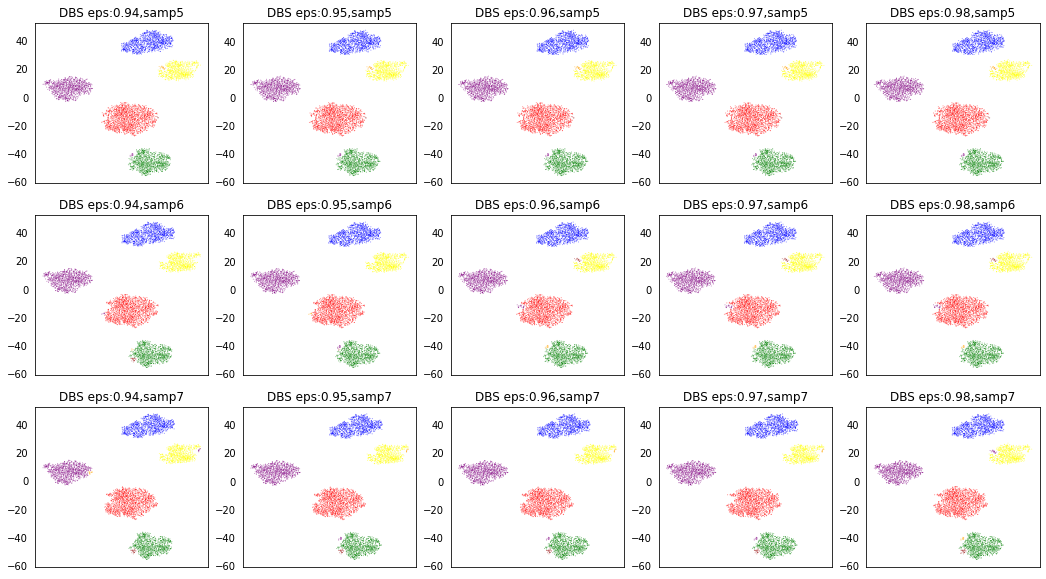

In [42]:
from sklearn.cluster import DBSCAN
from itertools import product

samp_list = [5,6,7]
eps_list = [0.94,0.95,0.96,0.97,0.98]
rows = len(samp_list)

fig,ax = plt.subplots(len(samp_list),len(eps_list), figsize=(18,10))

for k,(eps,samp) in enumerate(product(eps_list,samp_list)):
    ax[k%rows][math.floor(k/rows)].tick_params(axis='both',which='both',bottom=False,top=False,left=False,labelbottom=False)
    
    TSNE_df = TSNE_Components2.copy()
    clustering = DBSCAN(eps=eps, min_samples=samp).fit(TSNE_df)
    TSNE_df.insert(0, 'cluster', clustering.labels_)
    
    datas = [[TSNE_df[TSNE_df['cluster']==i][j] for j in range(2)] for i in range(len(set(clustering.labels_)))]
    colors = ('green','red','blue','yellow','purple', 'brown','orange','purple')
    groups = [str(i) for i in range(len(set(clustering.labels_)))]
    
    for  data,color,group in zip(datas, colors, groups):
        ax[k%rows][math.floor(k/rows)].scatter(data[0], data[1], alpha=0.5, c=color, edgecolor='none', s=1, label=group)
        ax[k%rows][math.floor(k/rows)].set_title(f'DBS eps:{eps},samp{samp}')

In [88]:
TSNE_df2 = TSNE_Components2.copy()
clustering = DBSCAN(eps=0.95, min_samples=6).fit(TSNE_df2)
TSNE_df2.insert(0, 'cluster', clustering.labels_)

In [100]:
TSNE_df2.head()

cluster          0          1
0        0 -11.315598 -18.329374
1        1 -14.659013   3.743079
2        1 -13.426284   5.180508
3      111   2.119494   2.740316
4        0  -7.193522 -31.763985

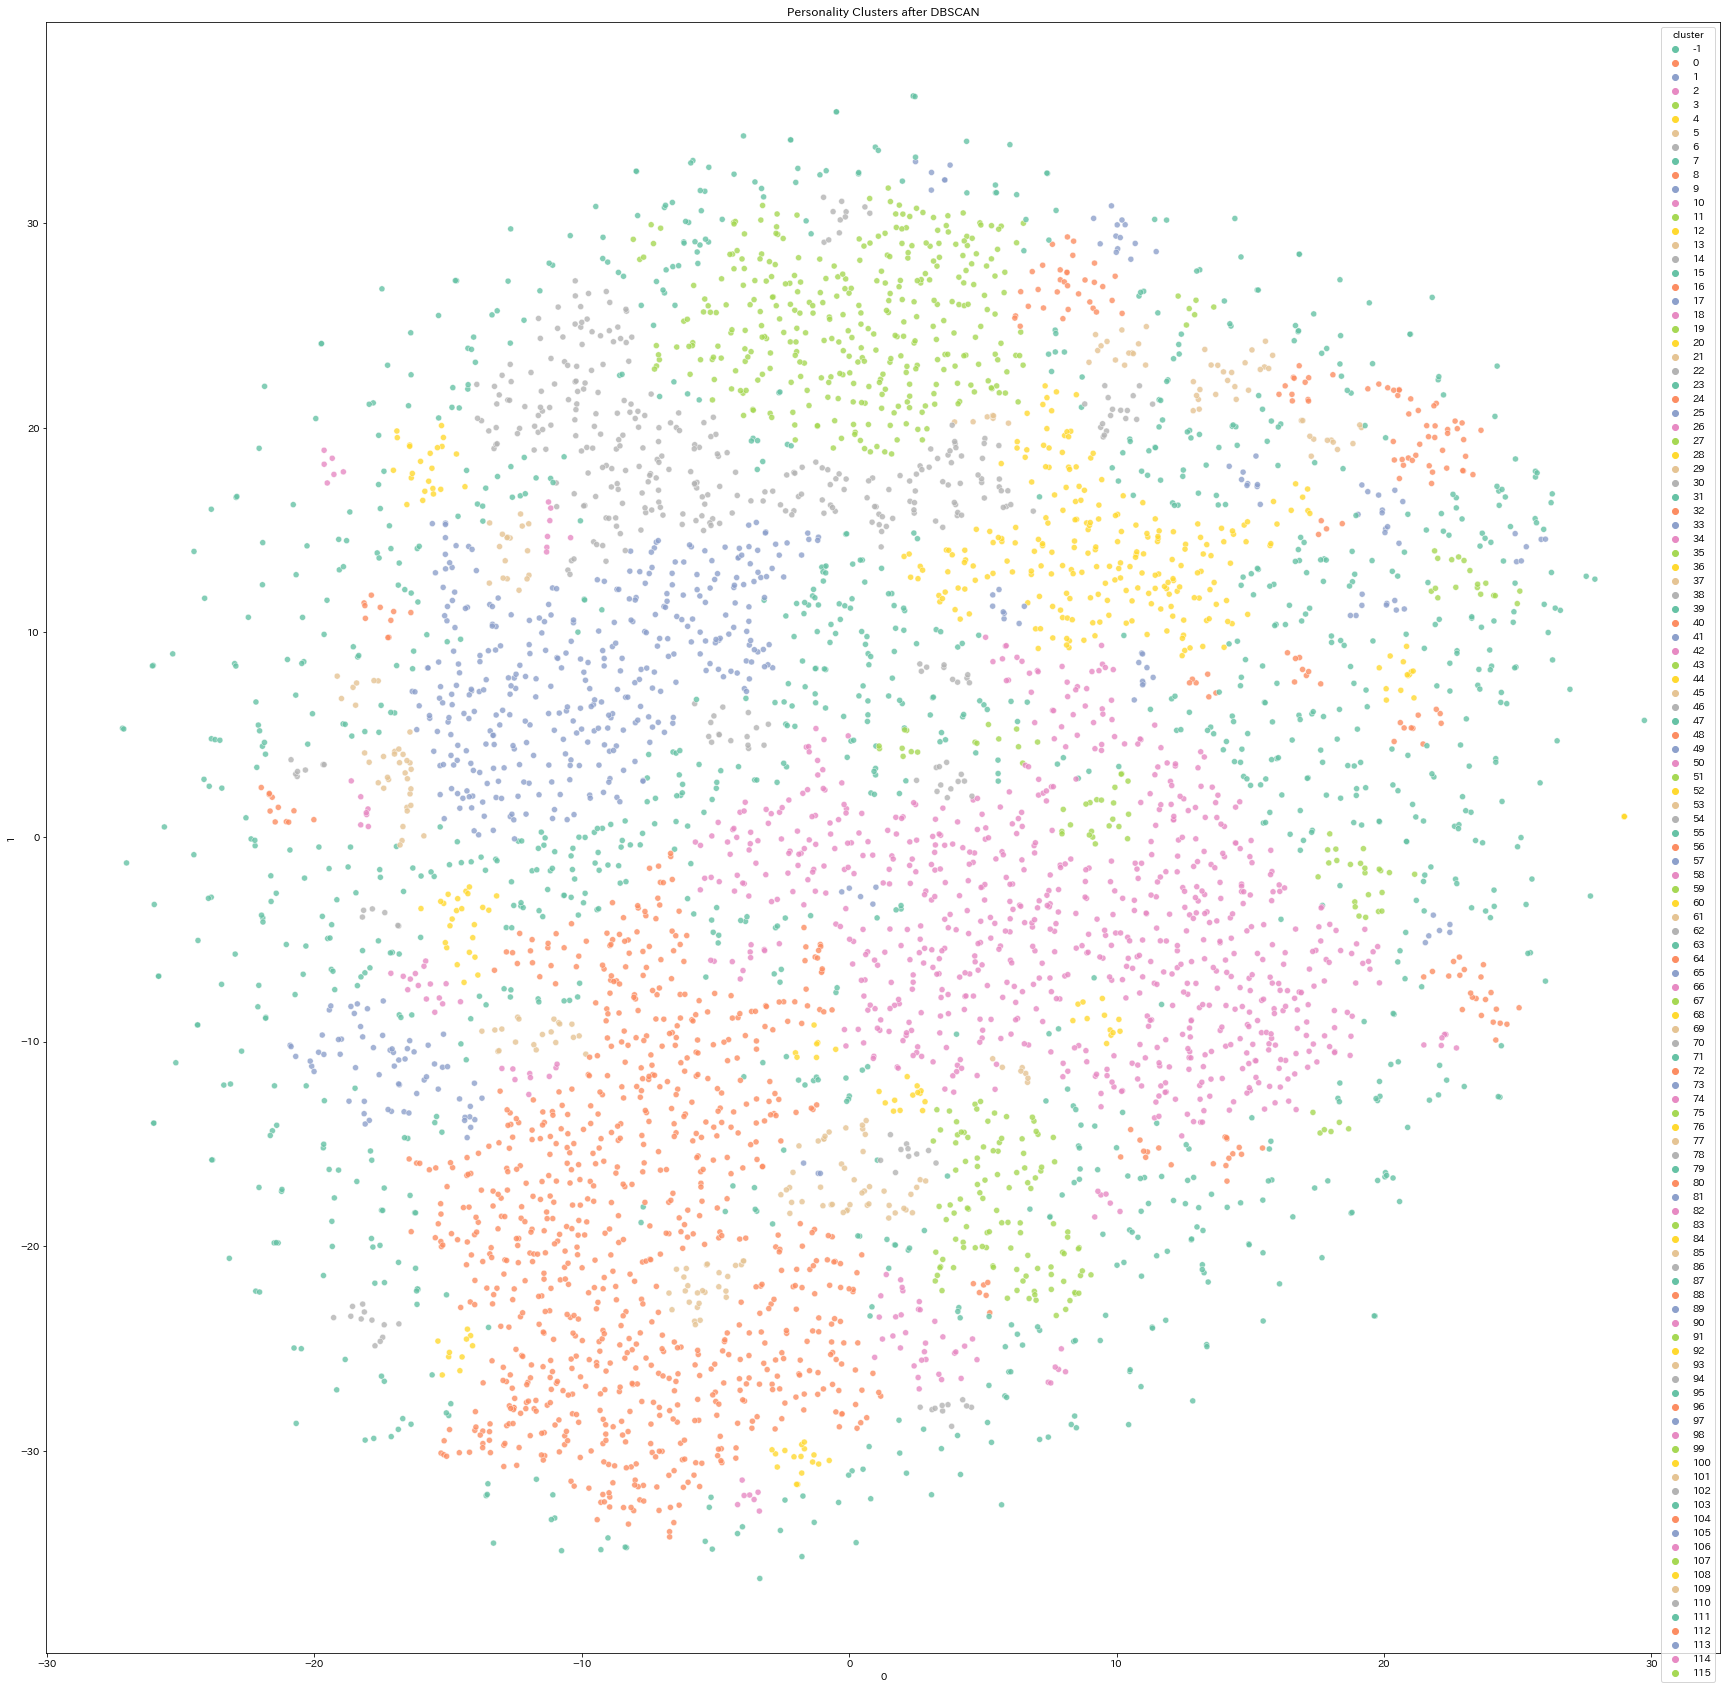

In [101]:

plt.figure(figsize = (30, 30))
#plt.scatter(TSNE_df2[0], TSNE_df2[1],alpha=0.5, c=color, edgecolor='none', s=100, label=group)

sns.scatterplot(data=TSNE_df2, x=TSNE_df2[0], y=TSNE_df2[1], hue=TSNE_df2['cluster'], palette='Set2', alpha=0.8)
plt.title('Personality Clusters after DBSCAN');